# Setup

In [124]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import scipy.spatial

import voxart

In [126]:
import importlib
importlib.reload(voxart)

<module 'voxart' from '/Users/priley/side_projects/voxart/voxart/__init__.py'>

# Early playing

In [4]:
test_vox2 = voxart.Design.from_size(7)
for i in [0, 6]:
    test_vox2.voxels[i, 0, :] = voxart.FILLED
    test_vox2.voxels[i, 6, :] = voxart.FILLED
    test_vox2.voxels[i, :, 0] = voxart.FILLED
    test_vox2.voxels[i, :, 6] = voxart.FILLED
for i in [6]:
    test_vox2.voxels[0, i, :] = voxart.FILLED
    test_vox2.voxels[6, i, :] = voxart.FILLED
    test_vox2.voxels[:, i, 0] = voxart.FILLED
    test_vox2.voxels[:, i, 6] = voxart.FILLED
display(test_vox2.voxels.sum())
test_vox2._voxels

116

array([[[2, 2, 2, 2, 2, 2, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 2],
        [2, 2, 2, 2, 2, 2, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 2]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],


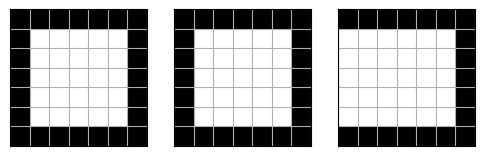

In [6]:
test_vox2.projections_fig()

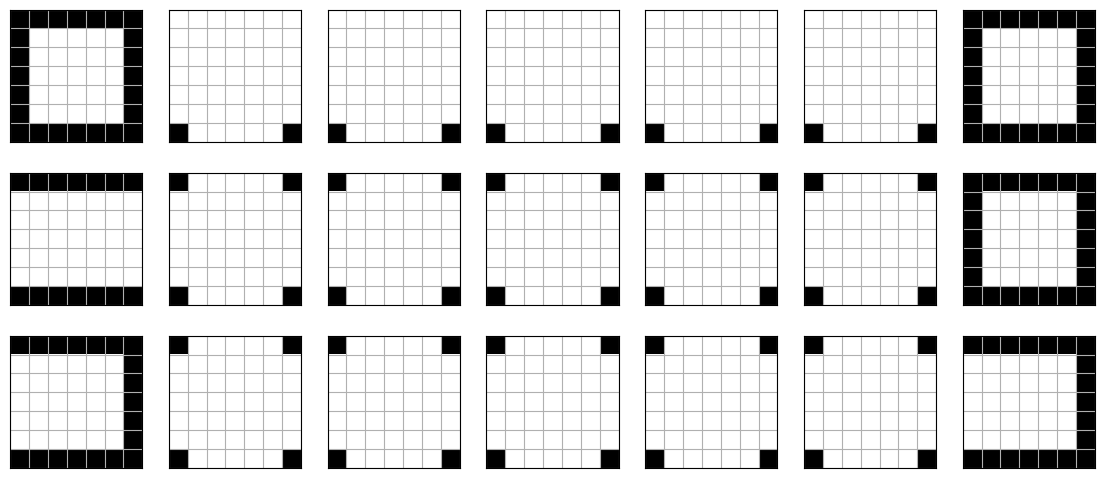

In [7]:
test_vox2.slices_fig()

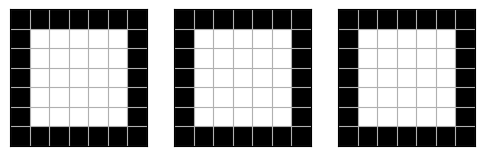

In [8]:
g = voxart.Goal.from_size(7)
g.add_frame()
g.fig()

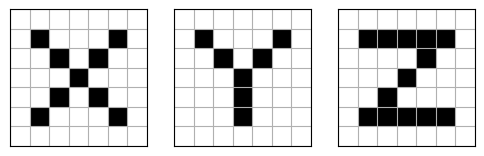

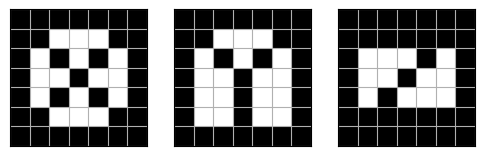

In [11]:
test_goal = voxart.Goal.from_arrays(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
)
display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())

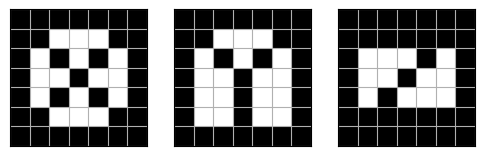

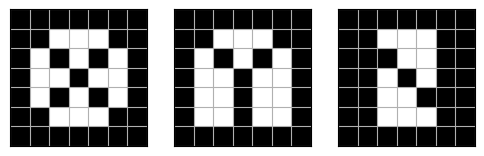

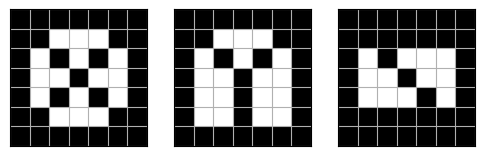

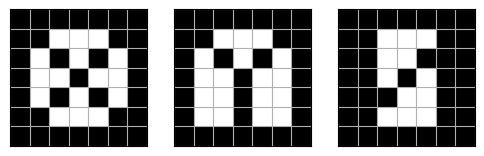

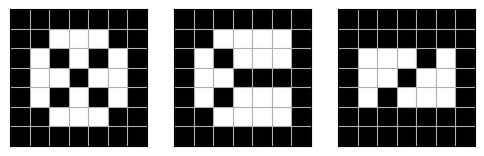

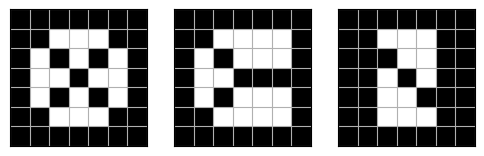

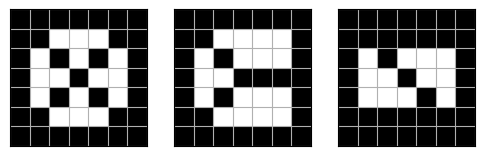

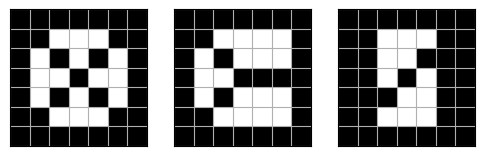

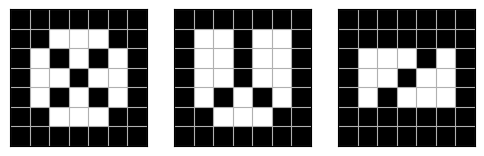

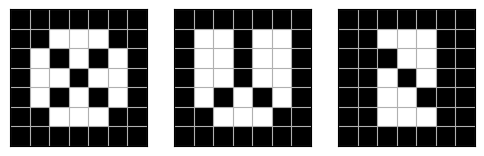

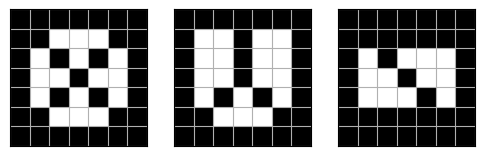

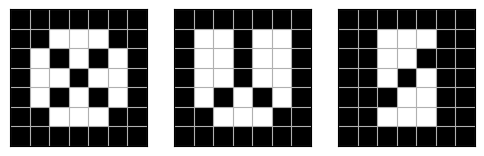

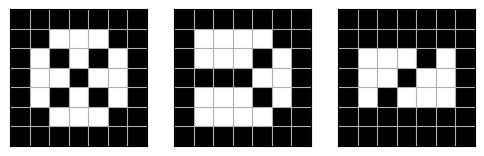

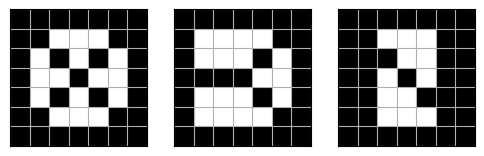

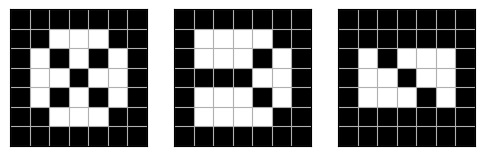

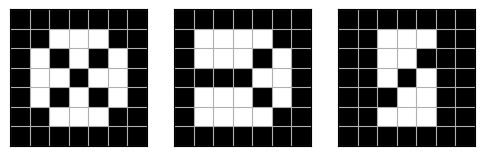

In [10]:
for g in test_goal.alternate_forms():
    display(g.fig())

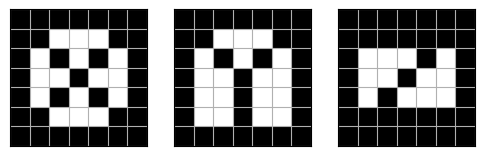

268

In [12]:
design = test_goal.create_base_design()
display(design.projections_fig())
display(design.voxels.sum())

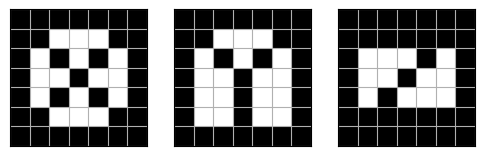

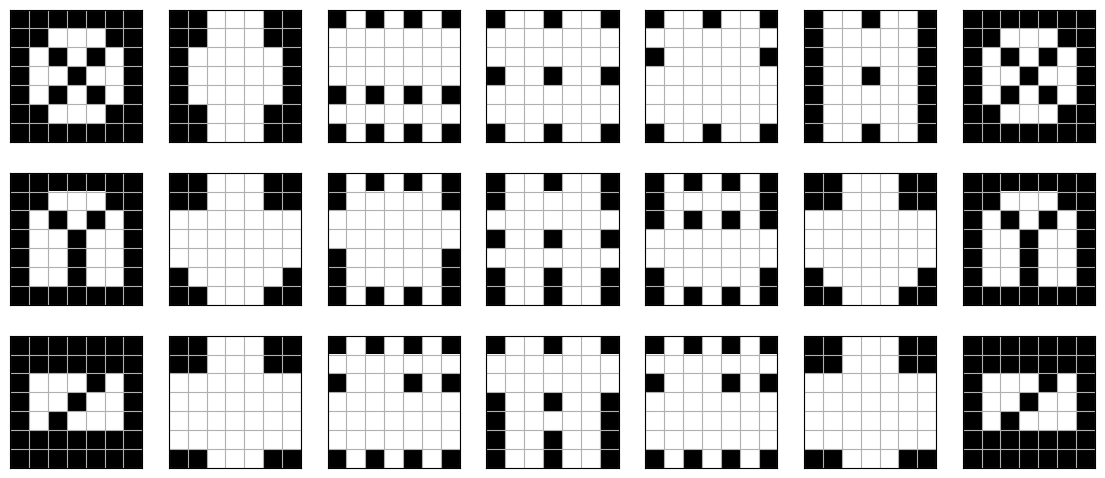

In [13]:
y, z = np.where(test_goal._goals[0] == 0)
design.voxels[:, y, z] = 0
x, z = np.where(test_goal._goals[1] == 0)
design.voxels[x, :, z] = 0
x, y = np.where(test_goal._goals[2] == 0)
design.voxels[x, y, :] = 0
display(design.projections_fig())
display(design.slices_fig())

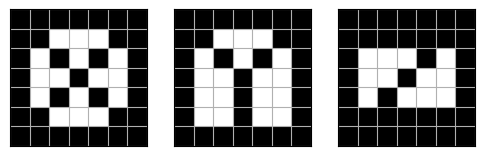

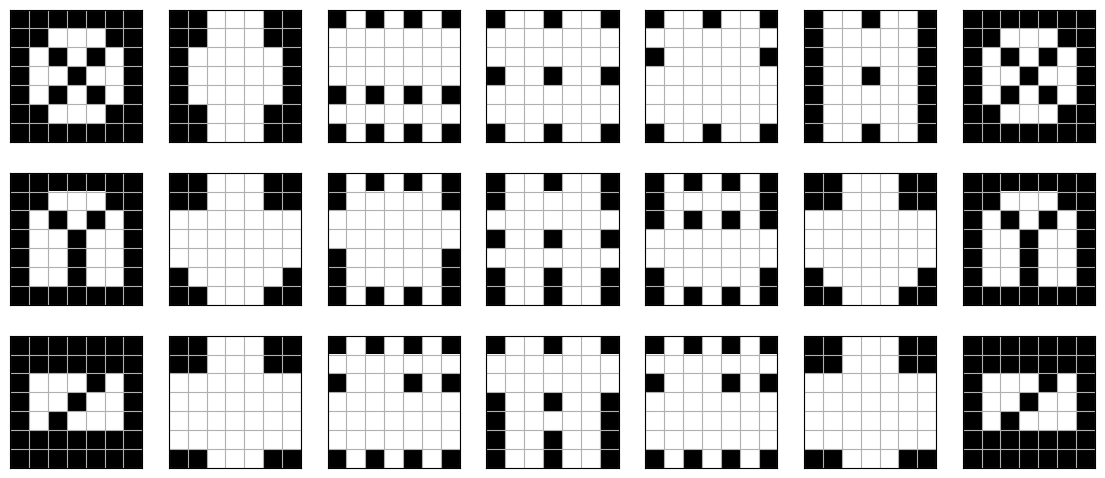

268

In [15]:
design2 = test_goal.create_base_design()
display(design2.projections_fig())
display(design2.slices_fig())
display(design2.voxels.sum())

In [16]:
voxart.Masks(4)

## find_removable

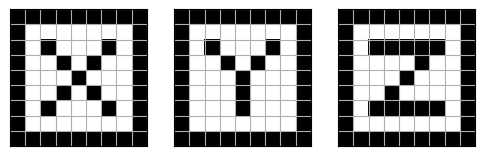

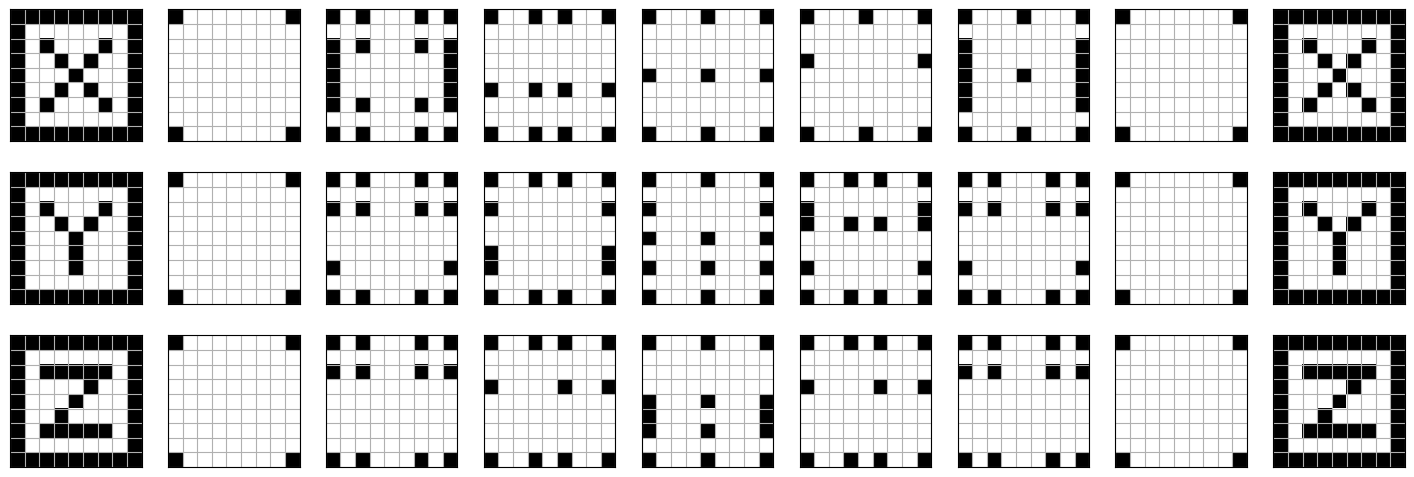

In [97]:
test_goal = voxart.Goal.from_arrays(
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 0, 0, 0, 2, 0,],
     [0, 0, 2, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0),
    np.pad(
    [[0, 0, 0, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 2, 0, 0,],
     [0, 0, 0, 2, 0, 0, 0,],
     [0, 0, 2, 0, 0, 0, 0,],
     [0, 2, 2, 2, 2, 2, 0,],
     [0, 0, 0, 0, 0, 0, 0,],
    ],
    pad_width=1, mode='constant', constant_values=0)
)
#display(test_goal.fig())
test_goal.add_frame()
display(test_goal.fig())
design = test_goal.create_base_design()
display(design.slices_fig())

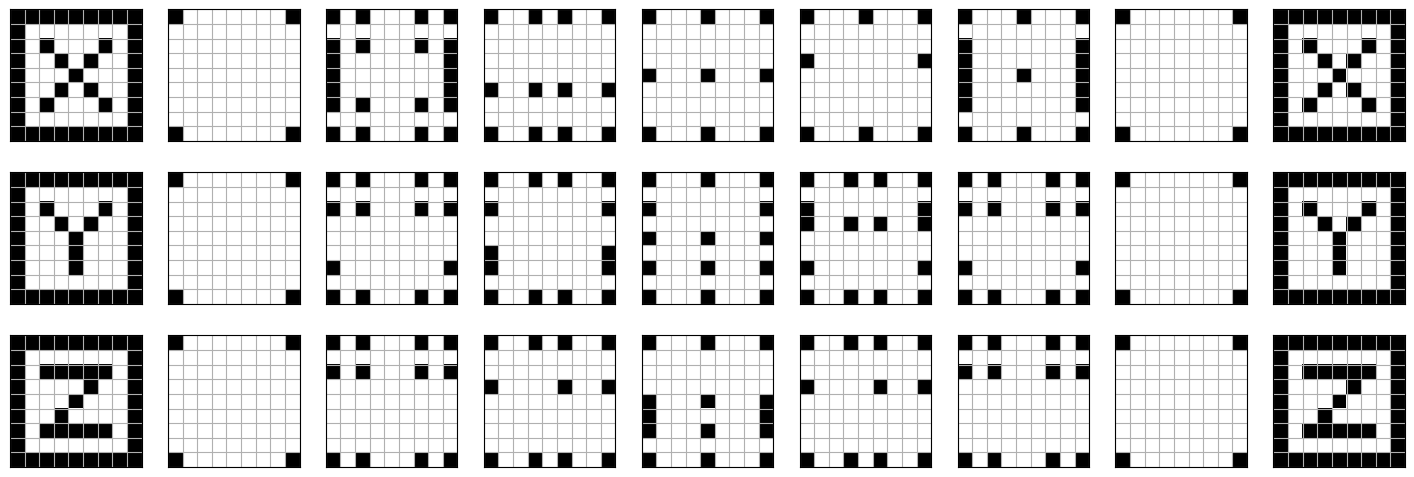

In [18]:
voxart.Design(design.find_removable_slow() * 2).slices_fig()

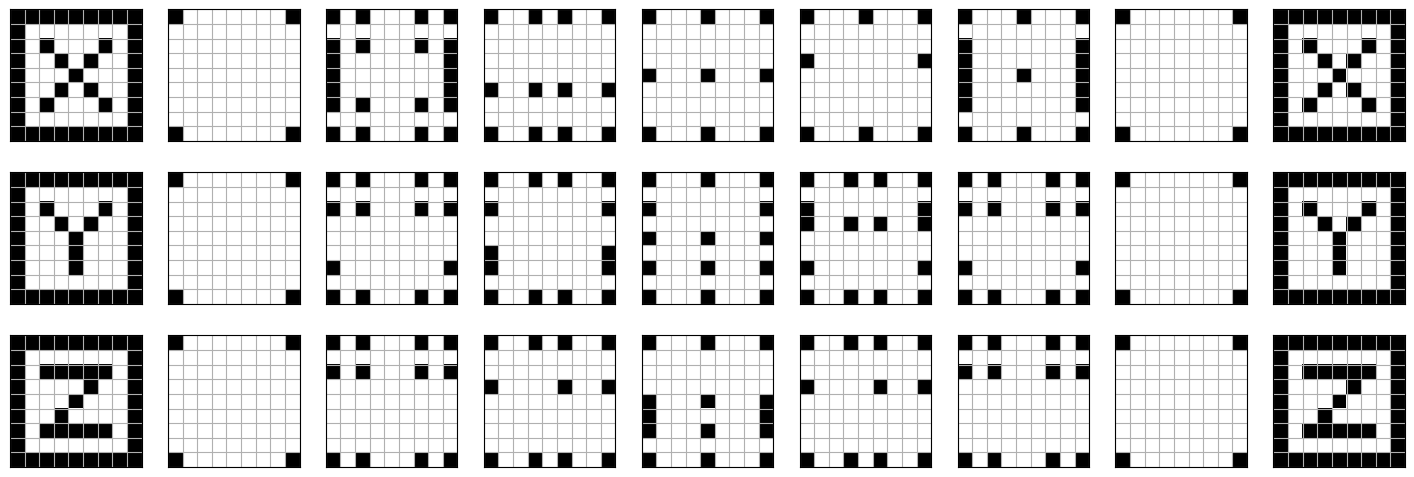

In [19]:
voxart.Design(design.find_removable() * 2).slices_fig()

## Search

Starting objective value: 153.0
Starting goal form 0
Starting goal form 1
Starting goal form 2
Starting goal form 3
Starting goal form 4
Starting goal form 5
Starting goal form 6
Starting goal form 7
Starting goal form 8
Starting goal form 9
Starting goal form 10
Starting goal form 11
Starting goal form 12
Starting goal form 13
Starting goal form 14
Starting goal form 15


,form_idx,is_starting,objective_value
160,14,False,37.0
168,15,False,26.5
96,8,False,35.5


form index: (5, False)
Value: 26.5


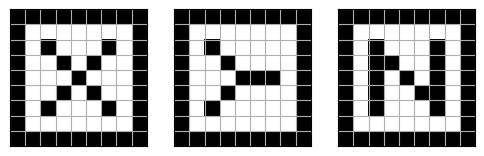

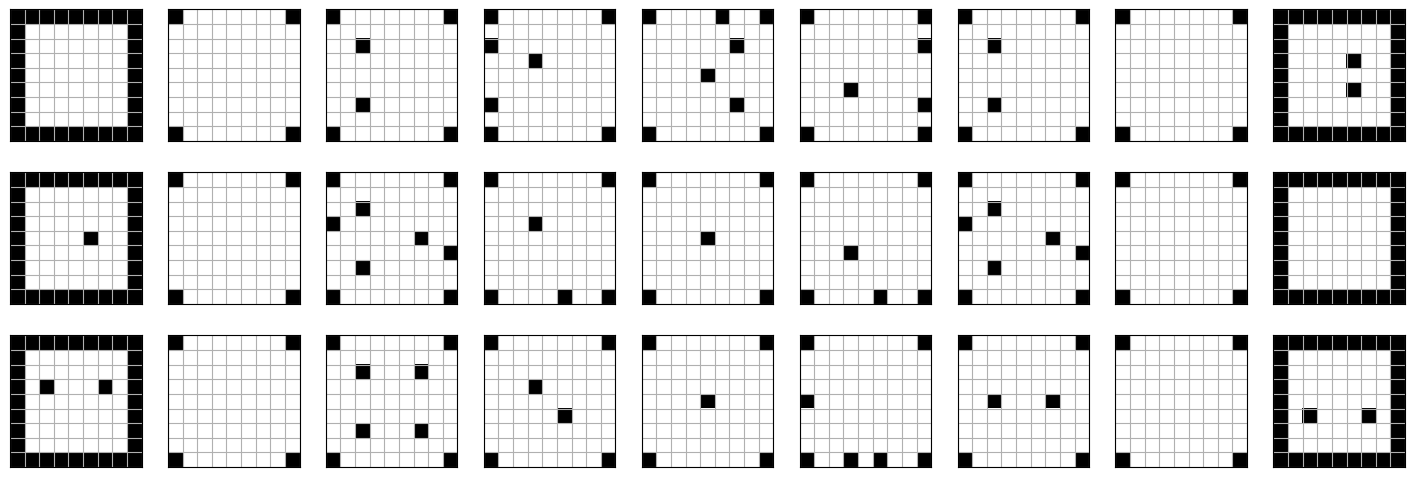

form index: (5, False)
Value: 26.5


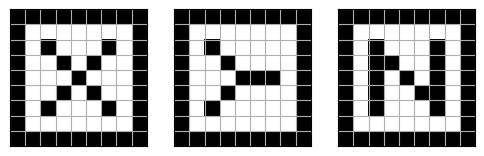

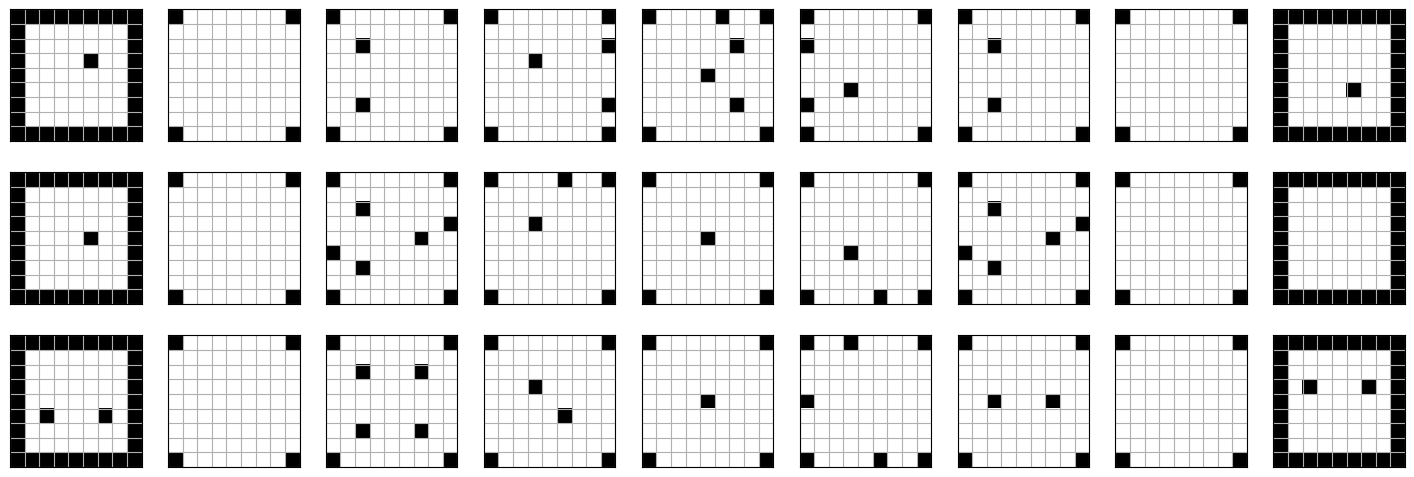

form index: (5, False)
Value: 26.5


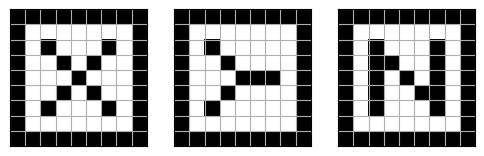

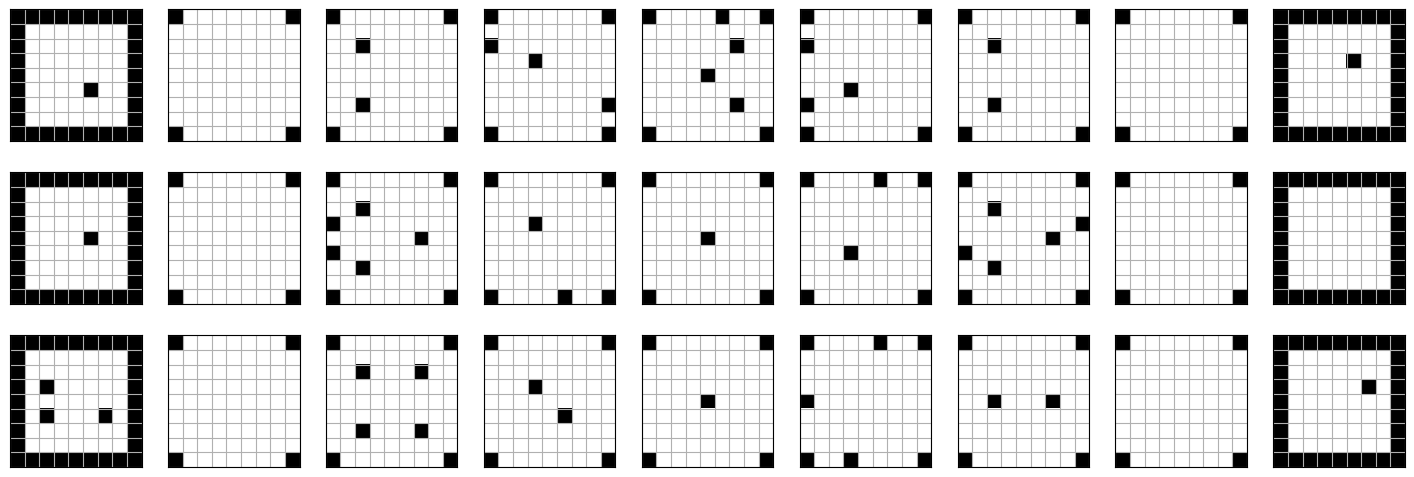

CPU times: user 7.6 s, sys: 564 ms, total: 8.17 s
Wall time: 6.76 s


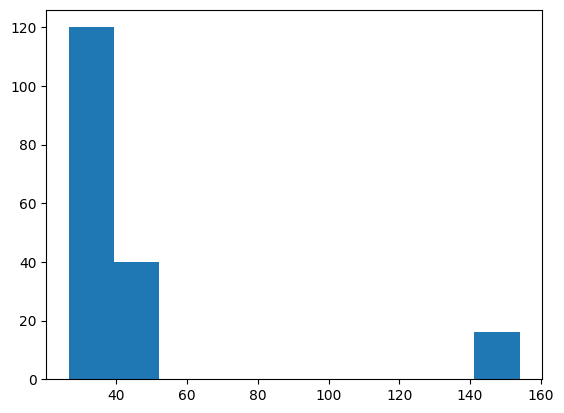

In [23]:
%%time
base_design = test_goal.create_base_design()
masks = voxart.Masks(base_design.size)
obj_func = voxart.ObjectiveFunction(masks=masks)
print("Starting objective value:", obj_func(base_design))
results = voxart.search(test_goal, "random_face_first", 10, 3)
df_results = results.all_objective_values(["form_idx", "is_starting"])
display(df_results.sample(3))
plt.hist(df_results["objective_value"])
for label, design in results.best():
    print("form index:", label)
    print("Value:", obj_func(design))
    display(design.projections_fig())
    display(design.slices_fig())

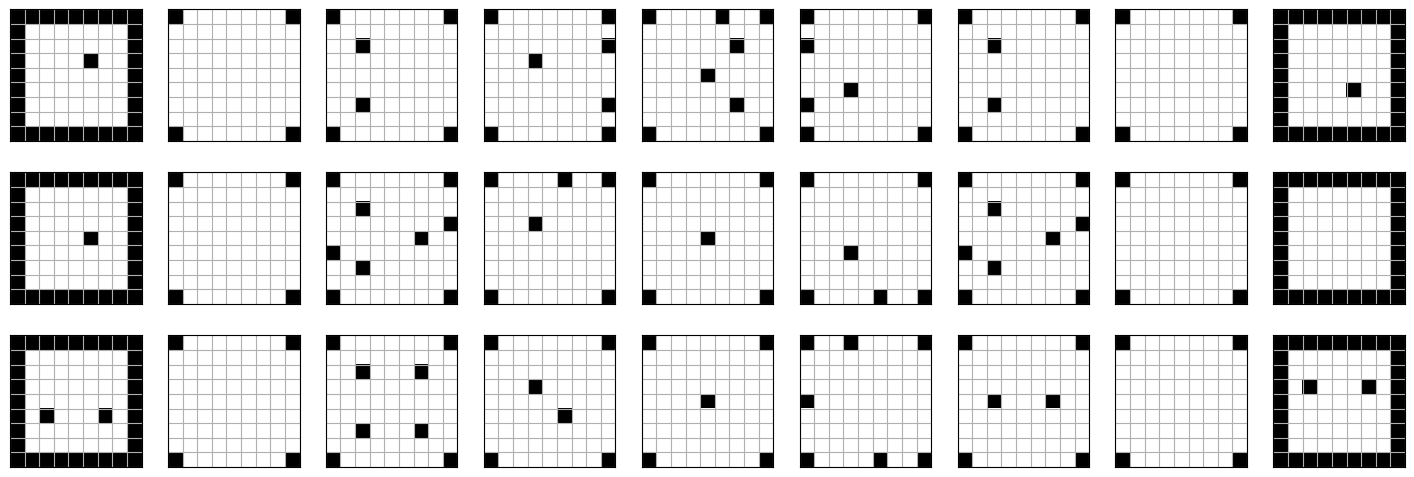

In [155]:
_, sparse_design = results.best()[1]
sparse_design.slices_fig()

## Looking at equality operations

In [24]:
goal0 = voxart.Goal.from_arrays([[1, 1], [0, 0]],
                                [[1, 0], [0, 0]],
                                [[0, 1], [0, 0]])
goal1 = voxart.Goal.from_arrays([[1, 1], [0, 0]],
                                [[1, 0], [0, 0]],
                                [[0, 1], [0, 0]])
goal2 = voxart.Goal.from_arrays([[1, 1], [1, 1]],
                                [[1, 0], [1, 1]],
                                [[0, 1], [1, 1]])
goal3 = voxart.Goal.from_arrays(np.pad([[1]], 2, constant_values=0),
                                np.pad([[1]], 2, constant_values=0),
                                np.pad([[1]], 2, constant_values=0))
display(goal0 == goal1)
display(goal0 == goal2)
display(goal1 == goal2)
display(goal0 == goal3)

True

False

False

False

In [25]:
goal0._goals == goal3._goals

/var/folders/06/hmgfyb_d5076hlrrhyncy5vc0000gq/T/ipykernel_86435/2463477595.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  goal0._goals == goal3._goals


False

In [26]:
set([goal0, goal1, goal2, goal3])

{<voxart.Goal at 0x7fcf96e0b2b0>,
 <voxart.Goal at 0x7fcf96e15610>}

In [26]:
hash(goal0._goals.data.tobytes())

2096551961257740828

## Making a faster find_removable

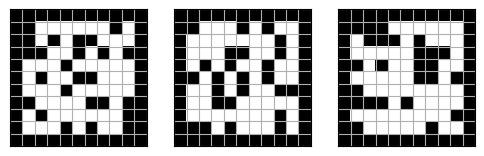

In [22]:
rng = np.random.default_rng()
goal_for_timing = voxart.Goal.from_arrays(
    rng.choice(a=[0, 2], p=[0.7, 0.3], size=(11, 11)),
    rng.choice(a=[0, 2], p=[0.7, 0.3], size=(11, 11)),
    rng.choice(a=[0, 2], p=[0.7, 0.3], size=(11, 11)))
goal_for_timing.add_frame()
design_for_timing = goal_for_timing.create_base_design()
design_for_timing.projections_fig()
    

In [27]:
%timeit design_for_timing.find_removable_slow()

3.2 ms ± 46 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
vox = design_for_timing.vox
display(np.sum(vox, axis=0))
display(np.sum(vox, axis=1))
display(np.sum(vox, axis=2))

array([[11,  5,  4,  3,  2,  4,  6,  3,  5,  4, 11],
       [ 9,  0,  0,  0,  2,  4,  0,  0,  0,  3,  9],
       [ 4,  0,  3,  0,  2,  0,  3,  0,  0,  2,  4],
       [ 4,  0,  2,  2,  0,  0,  0,  0,  0,  0,  4],
       [ 4,  0,  2,  0,  0,  2,  0,  0,  0,  0,  4],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  2,  0,  2],
       [ 6,  3,  0,  0,  0,  0,  0,  0,  0,  2,  6],
       [ 4,  3,  0,  0,  0,  0,  2,  0,  0,  0,  4],
       [ 4,  0,  0,  0,  2,  0,  0,  0,  0,  2,  4],
       [ 4,  0,  2,  0,  0,  0,  3,  0,  0,  0,  4],
       [11,  5,  4,  3,  2,  4,  6,  3,  5,  4, 11]])

array([[11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  2,  0,  6],
       [ 3,  2,  0,  0,  0,  0,  2,  0,  0,  2,  3],
       [ 3,  0,  0,  0,  0,  3,  0,  0,  0,  0,  3],
       [ 3,  0,  2,  2,  0,  3,  0,  2,  0,  0,  3],
       [ 4,  2,  0,  0,  0,  0,  2,  0,  0,  3,  4],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  3],
       [ 7,  4,  3,  0,  0,  0,  0,  0,  2,  0,  7],
       [11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11]])

array([[11,  5,  6,  4,  4,  4,  4,  4,  4,  4, 11],
       [ 3,  2,  0,  2,  0,  0,  2,  0,  0,  3,  3],
       [ 3,  2,  3,  0,  2,  0,  2,  0,  0,  0,  3],
       [ 3,  2,  0,  0,  0,  0,  2,  2,  0,  2,  3],
       [ 5,  0,  0,  0,  2,  0,  0,  0,  0,  0,  5],
       [ 3,  3,  0,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 6,  3,  0,  0,  0,  0,  0,  0,  0,  0,  6],
       [ 5,  3,  0,  2,  0,  0,  0,  0,  0,  0,  5],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  3],
       [ 5,  2,  3,  0,  0,  0,  3,  3,  2,  0,  5],
       [11,  5,  6,  4,  4,  4,  4,  4,  4,  4, 11]])

In [29]:
x = np.sum(vox, axis=1)
x

array([[11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  3,  0,  0,  0,  6],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  2,  0,  6],
       [ 3,  2,  0,  0,  0,  0,  2,  0,  0,  2,  3],
       [ 3,  0,  0,  0,  0,  3,  0,  0,  0,  0,  3],
       [ 3,  0,  2,  2,  0,  3,  0,  2,  0,  0,  3],
       [ 4,  2,  0,  0,  0,  0,  2,  0,  0,  3,  4],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  2,  0,  3],
       [ 7,  4,  3,  0,  0,  0,  0,  0,  2,  0,  7],
       [11,  4,  6,  4,  5,  4,  5,  2,  3,  6, 11]])

In [30]:
np.broadcast_to(np.expand_dims(x, axis=1), (11, 11, 11))

array([[[11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        ...,
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       ...,

       [[ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        ...,
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0

In [31]:
for ax in range(3):
    display(np.broadcast_to(np.expand_dims(np.sum(vox, axis=ax), axis=ax), (11, 11, 11)))

array([[[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4, 11]],

       [[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4, 11]],

       [[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4, 11]],

       ...,

       [[11,  5,  4, ...,  5,  4, 11],
        [ 9,  0,  0, ...,  0,  3,  9],
        [ 4,  0,  3, ...,  0,  2,  4],
        ...,
        [ 4,  0,  0, ...,  0,  2,  4],
        [ 4,  0,  2, ...,  0,  0,  4],
        [11,  5,  4, ...,  5,  4

array([[[11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        ...,
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11],
        [11,  4,  6, ...,  3,  6, 11]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       [[ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        ...,
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6],
        [ 6,  0,  0, ...,  0,  0,  6]],

       ...,

       [[ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        ...,
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0,  3],
        [ 3,  0,  0, ...,  2,  0

array([[[11, 11, 11, ..., 11, 11, 11],
        [ 5,  5,  5, ...,  5,  5,  5],
        [ 6,  6,  6, ...,  6,  6,  6],
        ...,
        [ 4,  4,  4, ...,  4,  4,  4],
        [ 4,  4,  4, ...,  4,  4,  4],
        [11, 11, 11, ..., 11, 11, 11]],

       [[ 3,  3,  3, ...,  3,  3,  3],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  3,  3,  3]],

       [[ 3,  3,  3, ...,  3,  3,  3],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 3,  3,  3, ...,  3,  3,  3],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  3,  3,  3]],

       ...,

       [[ 3,  3,  3, ...,  3,  3,  3],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  3,  3, ...,  3,  3

Original design


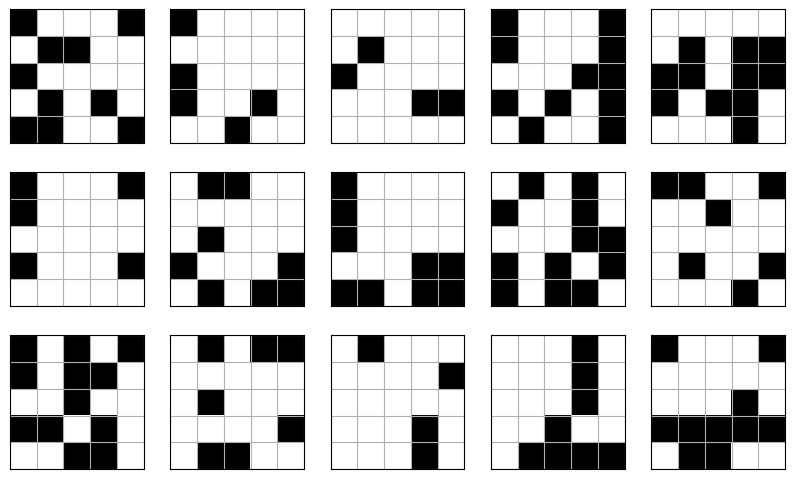

From slow process


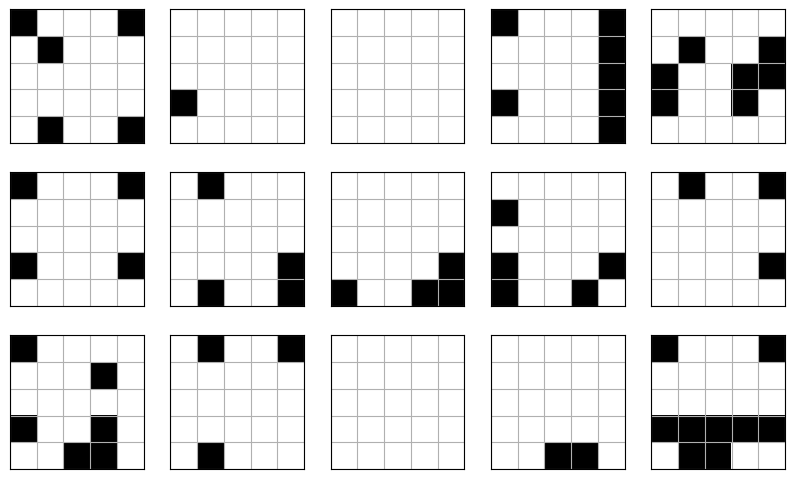

From fast process


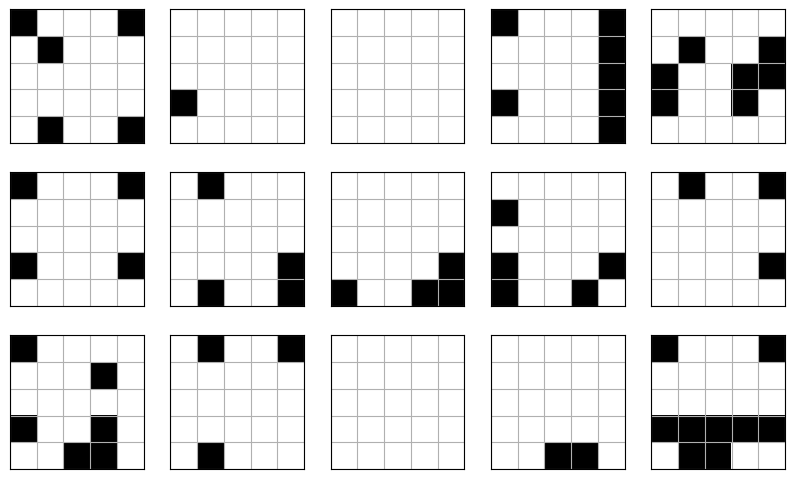

In [32]:
rng = np.random.default_rng(100)
size = 5
design = voxart.Design(rng.choice(a=[0, 1], p=[0.7, 0.3], size=(size, size, size)))
print("Original design")
display(design.slices_fig())
np.all(design.find_removable() == design.find_removable_slow())
print("From slow process")
display(voxart.Design(design.find_removable_slow()).slices_fig())
print("From fast process")
display(voxart.Design(design.find_removable()).slices_fig())

In [33]:
rng = np.random.default_rng(100)
size = 5
design = voxart.Design(rng.choice(a=[0, 1], p=[0.7, 0.3], size=(size, size, size)))
print("Original design")
display(design.voxels[0, :, :])
#display(design.slices_fig())
#np.all(design.find_removable() == design.find_removable_slow())
print("From slow process")
display(voxart.Design(design.find_removable_slow()).voxels[0, :, :])
print("From fast process")
display(voxart.Design(design.find_removable()).voxels[0, :, :])
#display(voxart.Design(design.find_removable()).slices_fig())
print("Sums array")
display(design._debug_sums)

Original design


array([[1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 1, 0, 0, 1]])

From slow process


array([[1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1]])

From fast process


array([[1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1]])

Sums array


AttributeError: 'Design' object has no attribute '_debug_sums'

In [36]:
%timeit design_for_timing.find_removable()

43.2 µs ± 607 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [51]:
help(np.load)

Help on function load in module numpy:

load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII', *, max_header_size=10000)
    Load arrays or pickled objects from ``.npy``, ``.npz`` or pickled files.
    
    .. warning:: Loading files that contain object arrays uses the ``pickle``
                 module, which is not secure against erroneous or maliciously
                 constructed data. Consider passing ``allow_pickle=False`` to
                 load data that is known not to contain object arrays for the
                 safer handling of untrusted sources.
    
    Parameters
    ----------
    file : file-like object, string, or pathlib.Path
        The file to read. File-like objects must support the
        ``seek()`` and ``read()`` methods and must always
        be opened in binary mode.  Pickled files require that the
        file-like object support the ``readline()`` method as well.
    mmap_mode : {None, 'r+', 'r', 'w+', 'c'}, optional
       

## Playing with image loading

In [52]:
import imageio

ModuleNotFoundError: No module named 'imageio'

In [39]:
from PIL import Image

In [55]:
img = Image.open("/usr/share/httpd/icons/small/binary.png")
x = np.array(img)
display(x.shape)
display(x)

(16, 16)

array([[192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192,
        192, 192, 192],
       [192, 192, 192, 192, 192, 192, 192, 192, 140, 192, 192, 192, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 206, 231, 140, 192, 192, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 206, 255, 231, 140, 192, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 206, 206, 206, 192, 140, 192,
        192, 192, 192],
       [206, 255, 255, 255, 255, 255, 255, 255,  57,  57,  57,  57, 192,
        192, 192, 192],
       [206, 255, 192, 107, 231, 206, 107, 206, 255, 192, 192, 107, 192,
        192, 192, 192],
       [206, 255, 107, 231, 140, 107, 255, 107, 255, 255, 231, 107, 192,
        192, 192, 192],
       [206, 255, 107, 255, 107, 107, 255, 107, 255, 255, 255, 107, 192,
        192, 192, 192],
       [206, 255, 140, 107, 231, 192, 107, 192, 255, 255, 255, 107, 192,
        192, 192, 192],
       [206, 255, 192, 107, 23

In [57]:
dir(img)

['_Image__transformer',
 '_PngImageFile__frame',
 '_PngImageFile__idat',
 '_PngImageFile__prepare_idat',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_category',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_fp',
 '_get_safe_box',
 '_getexif',
 '_getxmp',
 '_min_frame',
 '_new',
 '_open',
 '_reload_exif',
 '_repr_png_',
 '_repr_pretty_',
 '_seek',
 '_seek_check',
 '_size',
 '_text',
 'alpha_composite',
 'apply_transparency',
 'close',
 'convert',
 'copy',
 'crop',
 'cus

In [59]:
img.info

{'transparency': 192}

In [30]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c

In [29]:
test_goal._goals.flat(axis=0)

TypeError: flatten() got an unexpected keyword argument 'axis'

In [32]:
test_goal._goals.shape

(3, 9, 9)

In [60]:
np.reshape(test_goal._goals, (27, 9))

array([[255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 

In [73]:
def to_image(self):
    sz = self.size
    out = np.reshape(self._goals, (3 * sz, sz)).astype(np.uint8)
    out[np.where(out == voxart.EMPTY)] = 255
    out[np.where(out == voxart.FILLED)] = 0
    return Image.fromarray(out, mode='L')

to_image(test_goal)


In [84]:
img = to_image(test_goal)
img.save("/Users/priley/tmp/goal.png")
img

In [85]:
img2 = Image.open("/Users/priley/tmp/goal.png")
img2

In [88]:
np.array(img2.convert(mode="L"))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0],
       [  0, 255,   0, 255, 255, 255,   0, 255,   0],
       [  0, 255, 255,   0, 255,   0, 255, 255,   0],
       [  0, 255, 255, 255,   0, 255, 255, 255,   0],
       [  0, 255, 255,   0, 255,   0, 255, 255,   0],
       [  0, 255,   0, 255, 255, 255,   0, 255,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0],
       [  0, 255,   0, 255, 255, 255,   0, 255,   0],
       [  0, 255, 255,   0, 255,   0, 255, 255,   0],
       [  0, 255, 255, 255,   0, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0, 255, 255, 255,   0],
       [  0, 255, 255, 255,   0, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 

In [93]:
def from_image(img):
    arr = np.array(img.convert(mode="L"))
    arr[np.where(arr < 128)] = voxart.FILLED
    arr[np.where(arr >= 128)] = voxart.EMPTY
    
    sz = arr.shape[1]
    return voxart.Goal(arr.reshape((3, sz, sz)))

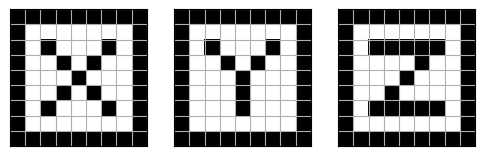

In [95]:
from_image(Image.open("/Users/priley/tmp/goal.png")).fig()

In [79]:
dir(img2)

['_Image__transformer',
 '_PngImageFile__frame',
 '_PngImageFile__idat',
 '_PngImageFile__prepare_idat',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_category',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_fp',
 '_get_safe_box',
 '_getexif',
 '_getxmp',
 '_min_frame',
 '_new',
 '_open',
 '_reload_exif',
 '_repr_png_',
 '_repr_pretty_',
 '_seek',
 '_seek_check',
 '_size',
 '_text',
 'alpha_composite',
 'apply_transparency',
 'close',
 'convert',
 'copy',
 'crop',
 'cus

In [98]:
test_goal.to_image().save("/tmp")

In [101]:
Image.Image

PIL.Image.Image

# Playing with things for the connectors

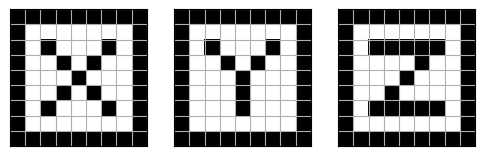

In [32]:
design = test_goal.create_base_design()
masks = voxart.Masks(design)
design.projections_fig()


In [38]:
[(x, y, z) for x, y, z in zip(*np.where(masks.edges))]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 8),
 (1, 8, 0),
 (1, 8, 8),
 (2, 0, 0),
 (2, 0, 8),
 (2, 8, 0),
 (2, 8, 8),
 (3, 0, 0),
 (3, 0, 8),
 (3, 8, 0),
 (3, 8, 8),
 (4, 0, 0),
 (4, 0, 8),
 (4, 8, 0),
 (4, 8, 8),
 (5, 0, 0),
 (5, 0, 8),
 (5, 8, 0),
 (5, 8, 8),
 (6, 0, 0),
 (6, 0, 8),
 (6, 8, 0),
 (6, 8, 8),
 (7, 0, 0),
 (7, 0, 8),
 (7, 8, 0),
 (7, 8, 8),
 (8, 0, 0),
 (8, 0, 1),
 (8, 0, 2),
 (8, 0, 3),
 (8, 0, 4),
 (8, 0, 5),
 (8, 0, 6),
 (8, 0, 7),
 (8, 0, 8),
 (8, 1, 0),
 (8, 1, 8),
 (8, 2, 0),
 (8, 2, 8),
 (8, 3, 0),
 (8, 3, 8),
 (8, 4, 0),
 (8, 4, 8),
 (8, 5, 0),
 (8, 5, 8),
 (8, 6, 0),
 (8, 6, 8),
 (8, 7, 0),
 (8, 7, 8),
 (8,

In [58]:
target, dist, path = voxart.get_shortest_path_to_targets(design, masks, targets={(1, 1, 1)})
assert target == (1, 1, 1)
display(dist)
for v in path:
    print(v, masks.edges[v])

2

(1, 1, 0) False
(1, 0, 0) True
(0, 0, 0) True
(0, 0, 1) True
(0, 0, 2) True
(0, 0, 3) True
(0, 0, 4) True
(0, 0, 5) True
(0, 0, 6) True
(0, 0, 7) True
(0, 0, 8) True
(0, 1, 8) True
(0, 2, 8) True
(0, 3, 8) True
(0, 4, 8) True
(0, 5, 8) True
(0, 6, 8) True
(0, 7, 8) True


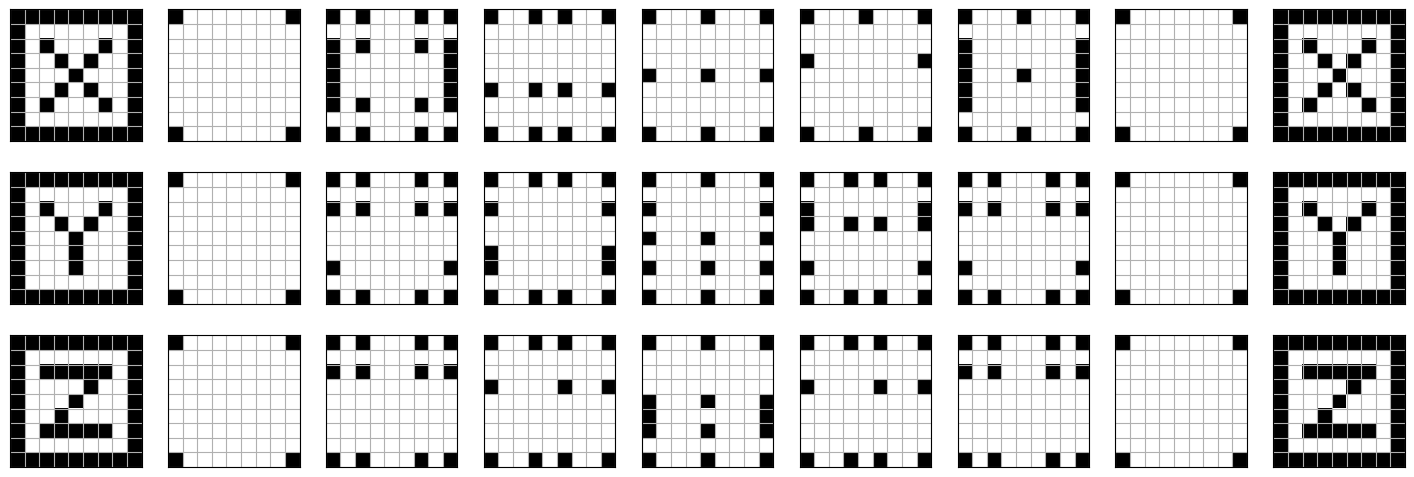

In [60]:
design.slices_fig()

4

(2, 2, 4) False
(2, 2, 3) False
(2, 2, 2) False
(2, 2, 1) False
(2, 2, 0) False
(2, 3, 0) False
(2, 4, 0) False
(2, 5, 0) False
(1, 5, 0) False


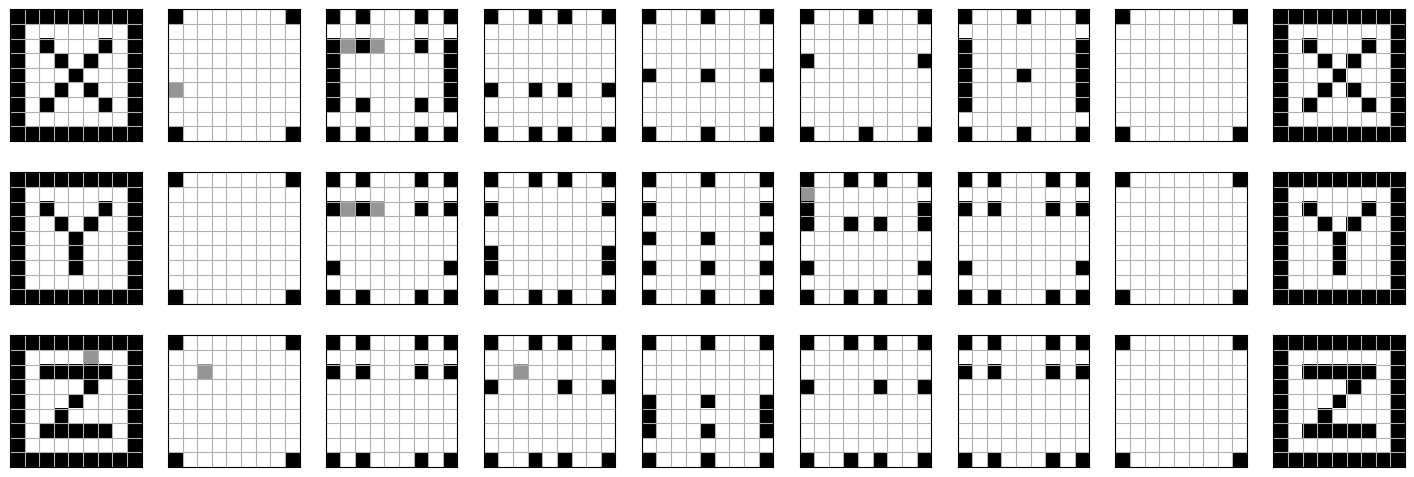

In [71]:
design = test_goal.create_base_design()
target, dist, path = voxart.get_shortest_path_to_targets(design, masks, targets={(2, 2, 4)})
assert target == (2, 2, 4)
display(dist)
for v in itertools.chain([target], path):
    print(v, masks.edges[v])
voxart.add_path_as_connectors(design, path)
design.slices_fig()

## Trying out the design with connectors

  0%|          | 0/16 [00:00<?, ?it/s]

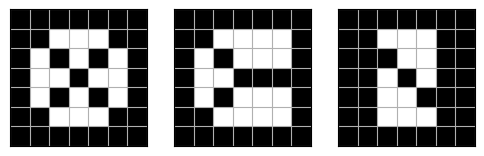

  0%|          | 0/200 [00:00<?, ?it/s]

,iter_idx,num_connectors,objective_value
30,30,14,69.0
89,89,13,68.0
138,138,14,69.0


iter_idx: (3, 13), value: 68.0, num_filled: 84, num_conn: 13


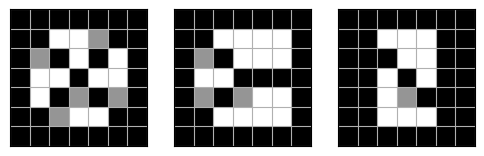

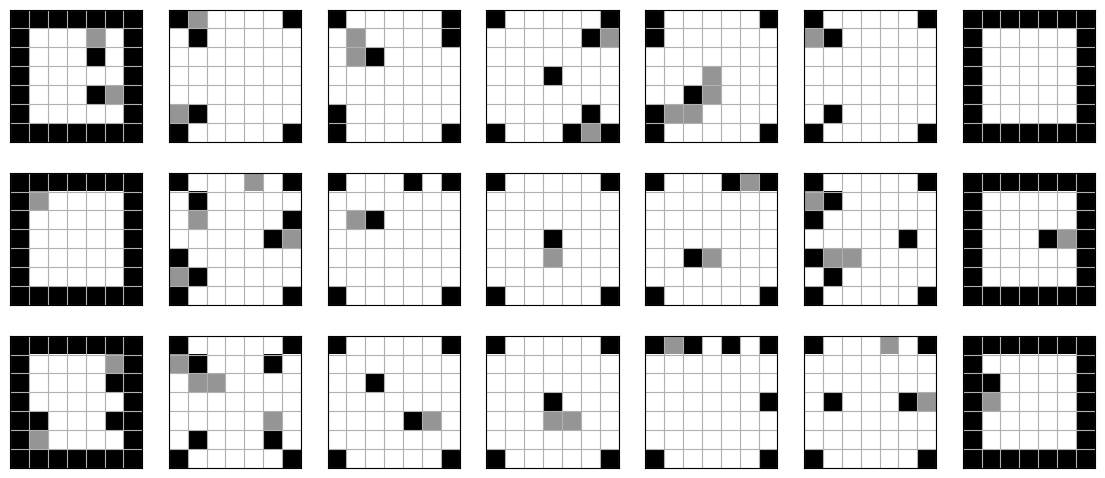

iter_idx: (5, 13), value: 68.0, num_filled: 84, num_conn: 13


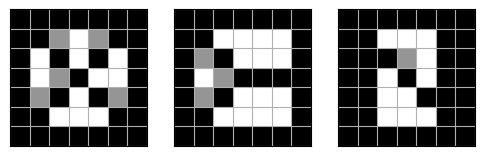

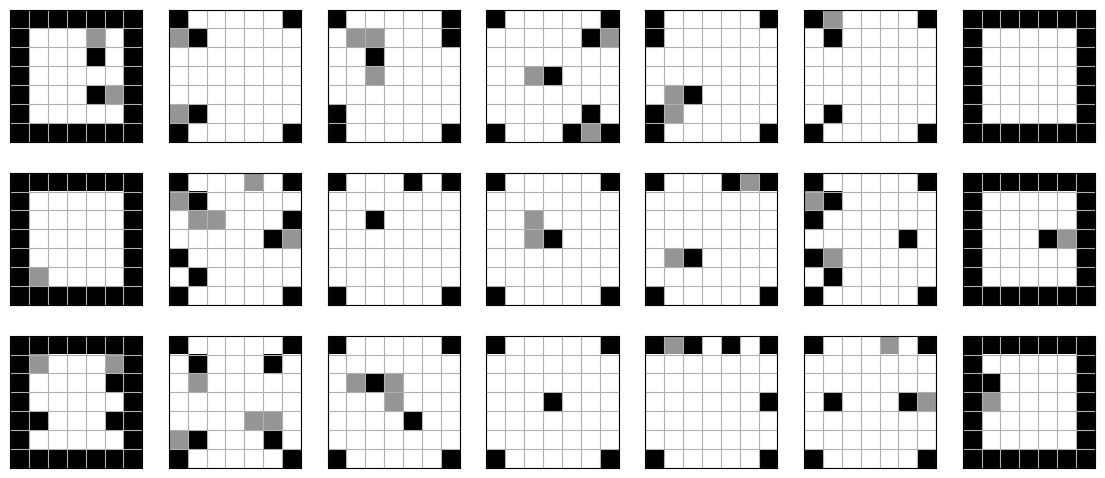

iter_idx: (15, 13), value: 68.0, num_filled: 84, num_conn: 13


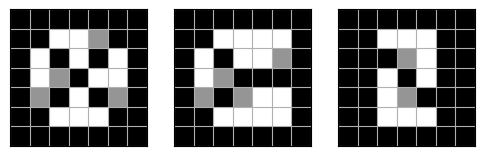

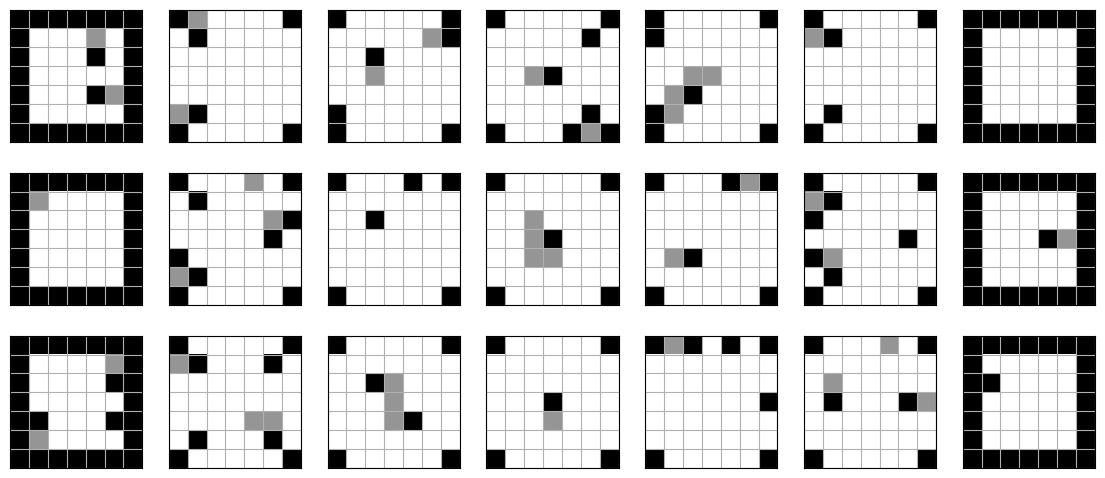

CPU times: user 18.2 s, sys: 5.56 s, total: 23.8 s
Wall time: 17.7 s


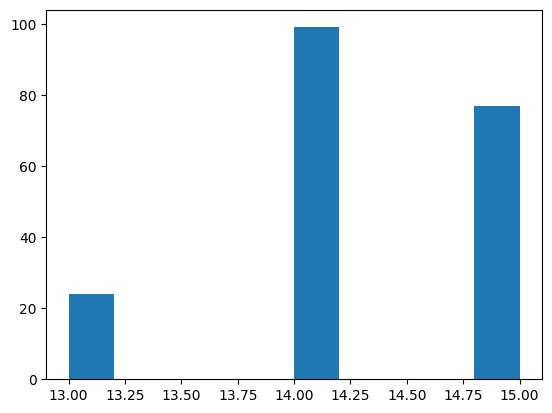

In [14]:
%%time
base_design = test_goal.create_base_design()
stage1_results = voxart.search(test_goal, "random_face_first", 10, 3)
_, unconnected_design = stage1_results.best()[0]
display(unconnected_design.projections_fig())
obj_func = voxart.ObjectiveFunction()
stage2_results = voxart.search_connectors(unconnected_design, 200, 3, obj_func)
df_results = stage2_results.all_objective_values(["iter_idx", "num_connectors"])
display(df_results.sample(3))
plt.hist(df_results["num_connectors"])
for label, design in stage2_results.best():
    print(f"iter_idx: {label}, value: {obj_func(design)}, num_filled: {design.num_filled()}, num_conn: {design.num_connectors()}")
    display(design.projections_fig())
    display(design.slices_fig())

# Playing with numpy-stl

In [102]:
import stl

In [105]:
data = np.zeros(6, dtype=stl.mesh.Mesh.dtype)
data

array([([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0])],
      dtype=[('normals', '<f4', (3,)), ('vectors', '<f4', (3, 3)), ('attr', '<u2', (1,))])

In [106]:
data['normals']

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [107]:
data['vectors']

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [108]:
# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = stl.mesh.Mesh(np.zeros(faces.shape[0], dtype=stl.mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

In [114]:
from mpl_toolkits import mplot3d
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(cube.vectors))

# Auto scale to the mesh size
scale = cube.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
#plt.show()
#

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [116]:
a = np.array([1, 2, 3], dtype=int)
a

array([1, 2, 3])

In [124]:
a.flags.writeable = False
hash(a)

TypeError: unhashable type: 'numpy.ndarray'

In [131]:
list(voxart.vox_to_triangles((0, 1, 2)))

[array([[0, 1, 2],
        [1, 1, 2],
        [0, 2, 2]]),
 array([[1, 2, 2],
        [1, 1, 2],
        [0, 2, 2]]),
 array([[0, 1, 3],
        [1, 1, 3],
        [0, 2, 3]]),
 array([[1, 2, 3],
        [1, 1, 3],
        [0, 2, 3]]),
 array([[0, 1, 2],
        [0, 1, 3],
        [1, 1, 2]]),
 array([[1, 1, 3],
        [0, 1, 3],
        [1, 1, 2]]),
 array([[0, 2, 2],
        [0, 2, 3],
        [1, 2, 2]]),
 array([[1, 2, 3],
        [0, 2, 3],
        [1, 2, 2]]),
 array([[0, 1, 2],
        [0, 1, 3],
        [0, 2, 2]]),
 array([[0, 2, 3],
        [0, 1, 3],
        [0, 2, 2]]),
 array([[1, 1, 2],
        [1, 1, 3],
        [1, 2, 2]]),
 array([[1, 2, 3],
        [1, 1, 3],
        [1, 2, 2]])]

In [150]:
vox_stl = stl.mesh.Mesh(np.zeros(12, dtype=stl.mesh.Mesh.dtype))
for i, tri in enumerate(voxart.vox_to_triangles((0, 0, 0))):
    print(i)
    for j in range(3):
        print(tri[j])
        vox_stl.vectors[i][j] = tri[j]
display(vox_stl)
vox_stl.save("/Users/priley/tmp/vox.stl", mode=stl.Mode.ASCII)

0
[0 0 0]
[0 1 0]
[1 0 0]
1
[1 1 0]
[1 0 0]
[0 1 0]
2
[0 0 1]
[1 0 1]
[0 1 1]
3
[1 1 1]
[0 1 1]
[1 0 1]
4
[0 0 0]
[1 0 0]
[0 0 1]
5
[1 0 1]
[0 0 1]
[1 0 0]
6
[0 1 0]
[0 1 1]
[1 1 0]
7
[1 1 1]
[1 1 0]
[0 1 1]
8
[0 0 0]
[0 0 1]
[0 1 0]
9
[0 1 1]
[0 1 0]
[0 0 1]
10
[1 0 0]
[1 1 0]
[1 0 1]
11
[1 1 1]
[1 0 1]
[1 1 0]


<Mesh: '' 12 vertices>

In [136]:
help(vox_stl.save)

Help on method save in module stl.stl:

save(filename, fh=None, mode=<Mode.AUTOMATIC: 0>, update_normals=True) method of stl.mesh.Mesh instance
    Save the STL to a (binary) file
    
    If mode is :py:data:`AUTOMATIC` an :py:data:`ASCII` file will be
    written if the output is a TTY and a :py:data:`BINARY` file otherwise.
    
    :param str filename: The file to load
    :param file fh: The file handle to open
    :param int mode: The mode to write, default is :py:data:`AUTOMATIC`.
    :param bool update_normals: Whether to update the normals



In [143]:
import importlib
importlib.reload(voxart)

<module 'voxart' from '/Users/priley/side_projects/voxart/voxart/__init__.py'>

In [152]:
def vox_to_stl(vox):
    out = stl.mesh.Mesh(np.zeros(12, dtype=stl.mesh.Mesh.dtype))
    for i, tri in enumerate(voxart.vox_to_triangles(vox)):
        for j in range(3):
            out.vectors[i][j] = tri[j]
    return out

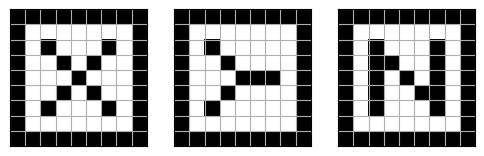

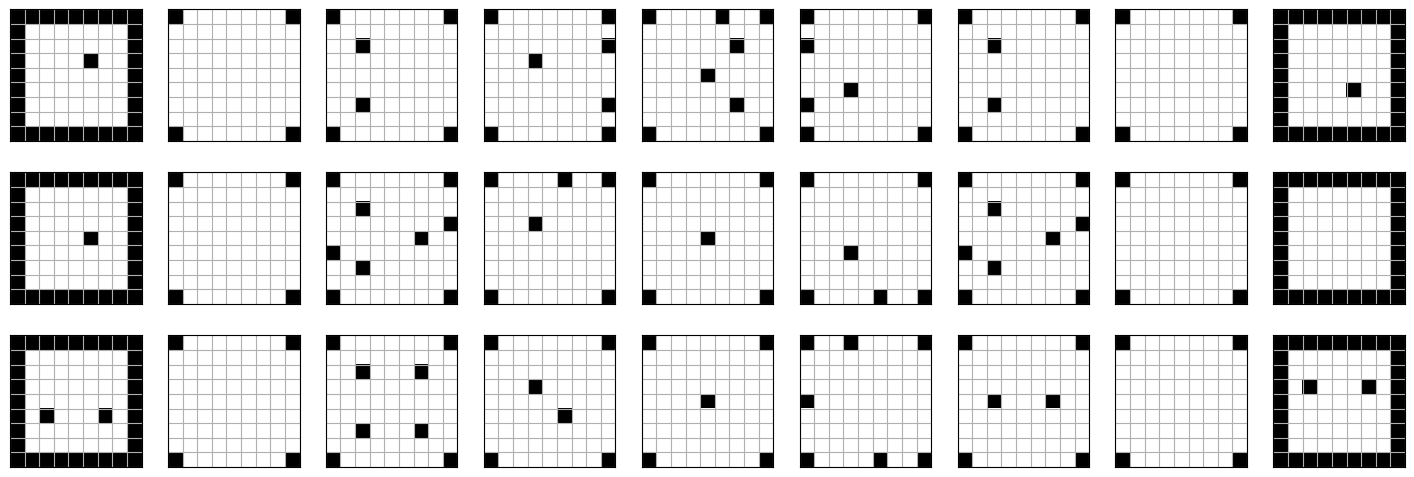

In [158]:
display(sparse_design.projections_fig())
sparse_design.slices_fig()

In [162]:
meshes = []
for vox in zip(*np.where(sparse_design.voxels == voxart.FILLED)):
    meshes.append(vox_to_stl(vox))
sparse_design_stl = stl.mesh.Mesh(np.concatenate([m.data for m in meshes]))
display(sparse_design_stl)
sparse_design_stl.save("/Users/priley/tmp/test_design.stl", mode=stl.Mode.ASCII)

<Mesh: '' 1296 vertices>

In [164]:
v = voxart.Design(sparse_design.voxels)
v

In [165]:
v.voxels

array([[[2, 2, 2, 2, 2, 2, 2, 2, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 2, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 0, 0, 0, 0, 0, 0, 0, 2],
        [2, 2, 2, 2, 2, 2, 2, 2, 2]],

       [[2, 0, 0, 0, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 2]],

       [[2, 0, 0, 0, 0, 0, 0, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 2

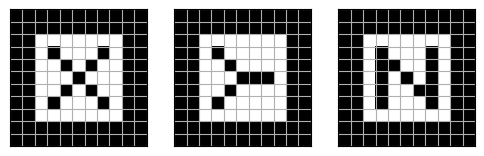

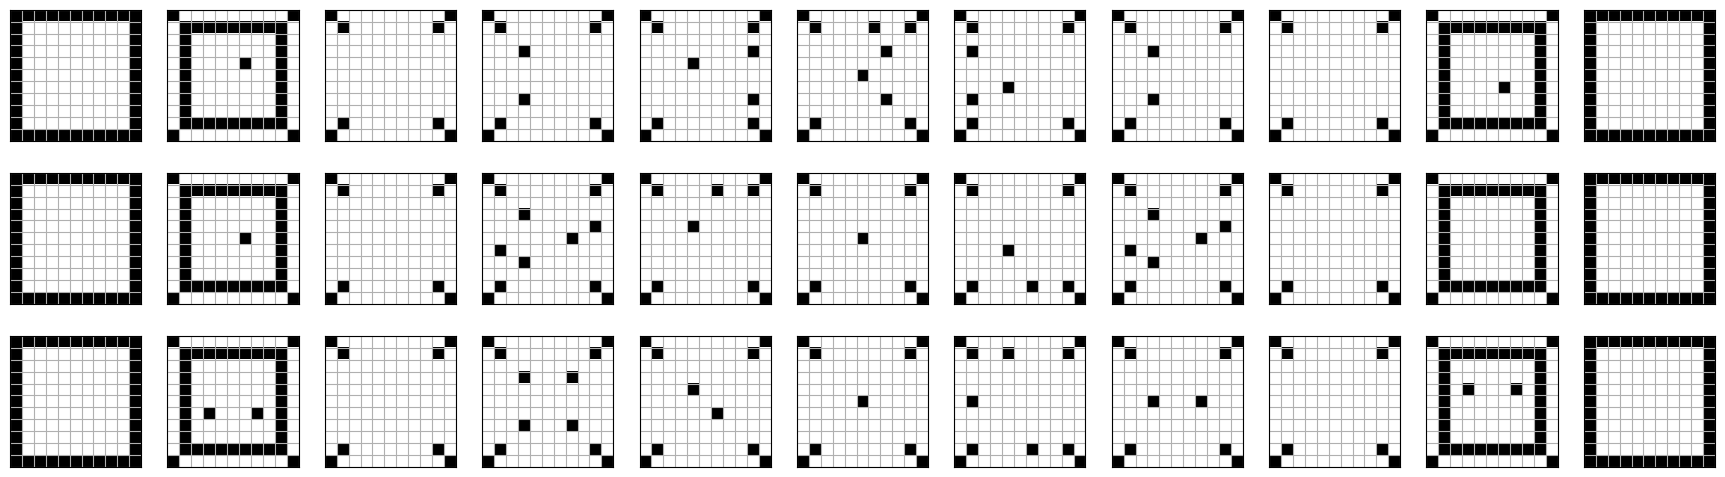

In [176]:
v2 = voxart.Design(np.pad(v.voxels, pad_width=1, constant_values=voxart.EMPTY))
v2.voxels[0, (0, -1), :] = voxart.FILLED
v2.voxels[-1, (0, -1), :] = voxart.FILLED
v2.voxels[0, :, (0, -1)] = voxart.FILLED
v2.voxels[-1, :, (0, -1)] = voxart.FILLED
v2.voxels[:, (0, -1), 0] = voxart.FILLED
v2.voxels[:, (0, -1), -1] = voxart.FILLED
#v2.voxels[(0, -1), :, (0, -1)] = voxart.FILLED
#v2.voxels[:, (0, -1), (0, -1)] = voxart.FILLED
display(v2.projections_fig())
display(v2.slices_fig())

In [177]:
meshes = []
for vox in zip(*np.where(v2.voxels == voxart.FILLED)):
    meshes.append(vox_to_stl(vox))
sparse_design_stl = stl.mesh.Mesh(np.concatenate([m.data for m in meshes]))
display(sparse_design_stl)
sparse_design_stl.save("/Users/priley/tmp/test_design_v2.stl", mode=stl.Mode.ASCII)

<Mesh: '' 2688 vertices>

In [18]:
list(voxart.vox_to_triangles((0, 0, 0)))

[array([[0, 1, 0],
        [1, 1, 0],
        [0, 0, 0]]),
 array([[1, 0, 0],
        [0, 0, 0],
        [1, 1, 0]]),
 array([[1, 0, 0],
        [1, 0, 1],
        [0, 0, 0]]),
 array([[0, 0, 1],
        [0, 0, 0],
        [1, 0, 1]]),
 array([[1, 1, 0],
        [1, 1, 1],
        [1, 0, 0]]),
 array([[1, 0, 1],
        [1, 0, 0],
        [1, 1, 1]]),
 array([[0, 1, 0],
        [0, 1, 1],
        [1, 1, 0]]),
 array([[1, 1, 1],
        [1, 1, 0],
        [0, 1, 1]]),
 array([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 0]]),
 array([[0, 1, 1],
        [0, 1, 0],
        [0, 0, 1]]),
 array([[1, 0, 1],
        [1, 1, 1],
        [0, 0, 1]]),
 array([[0, 1, 1],
        [0, 0, 1],
        [1, 1, 1]])]

In [17]:
list(voxart.vox_to_triangles_old((0, 0, 0)))

[array([[0, 0, 0],
        [0, 1, 0],
        [1, 0, 0]]),
 array([[1, 1, 0],
        [1, 0, 0],
        [0, 1, 0]]),
 array([[0, 0, 1],
        [1, 0, 1],
        [0, 1, 1]]),
 array([[1, 1, 1],
        [0, 1, 1],
        [1, 0, 1]]),
 array([[0, 0, 0],
        [1, 0, 0],
        [0, 0, 1]]),
 array([[1, 0, 1],
        [0, 0, 1],
        [1, 0, 0]]),
 array([[0, 1, 0],
        [0, 1, 1],
        [1, 1, 0]]),
 array([[1, 1, 1],
        [1, 1, 0],
        [0, 1, 1]]),
 array([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 0]]),
 array([[0, 1, 1],
        [0, 1, 0],
        [0, 0, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [1, 0, 1]]),
 array([[1, 1, 1],
        [1, 0, 1],
        [1, 1, 0]])]

# Playing with more spacing

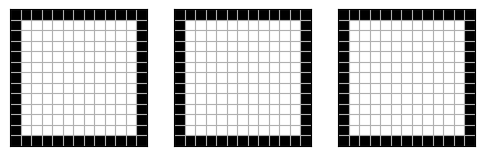

In [179]:
goal13 = voxart.Goal.from_size(13)
goal13.add_frame()
display(goal13.fig())
goal13.to_image().save("empty13.png")

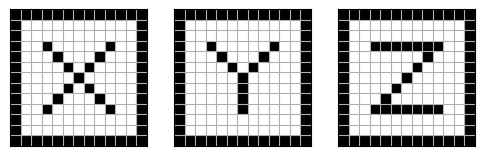

In [181]:
goal_xyz = voxart.Goal.from_image(Image.open("../assets/xyz_13.png"))
goal_xyz.fig()

Starting goal form 0
Starting goal form 1
Starting goal form 2
Starting goal form 3
Starting goal form 4
Starting goal form 5
Starting goal form 6
Starting goal form 7
Starting goal form 8
Starting goal form 9
Starting goal form 10
Starting goal form 11
Starting goal form 12
Starting goal form 13
Starting goal form 14
Starting goal form 15
search_connectors: completed 0
search_connectors: completed 1
search_connectors: completed 2
search_connectors: completed 3
search_connectors: completed 4
search_connectors: completed 5
search_connectors: completed 6
search_connectors: completed 7
search_connectors: completed 8
search_connectors: completed 9
search_connectors: completed 10
search_connectors: completed 11
search_connectors: completed 12
search_connectors: completed 13
search_connectors: completed 14
search_connectors: completed 15
search_connectors: completed 16
search_connectors: completed 17
search_connectors: completed 18
search_connectors: completed 19


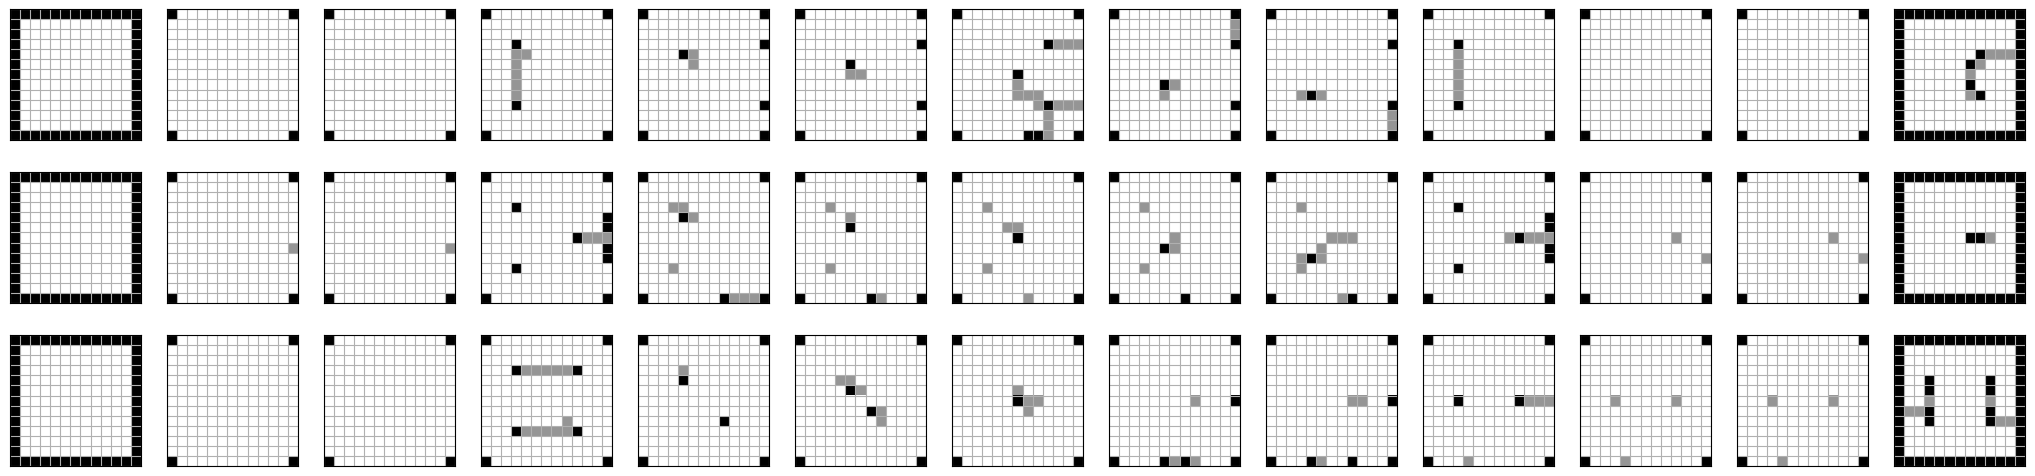

In [244]:
results_filled = voxart.search(goal_xyz, "random_clear_front", num_iterations=50, top_n=1)
_, design_xyz = results_filled.best()[0]
results_conn = voxart.search_connectors(design_xyz, num_iterations=20, top_n=1)
_, design_xyz_conn = results_conn.best()[0]
display(design_xyz_conn.slices_fig())


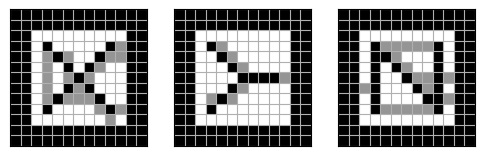

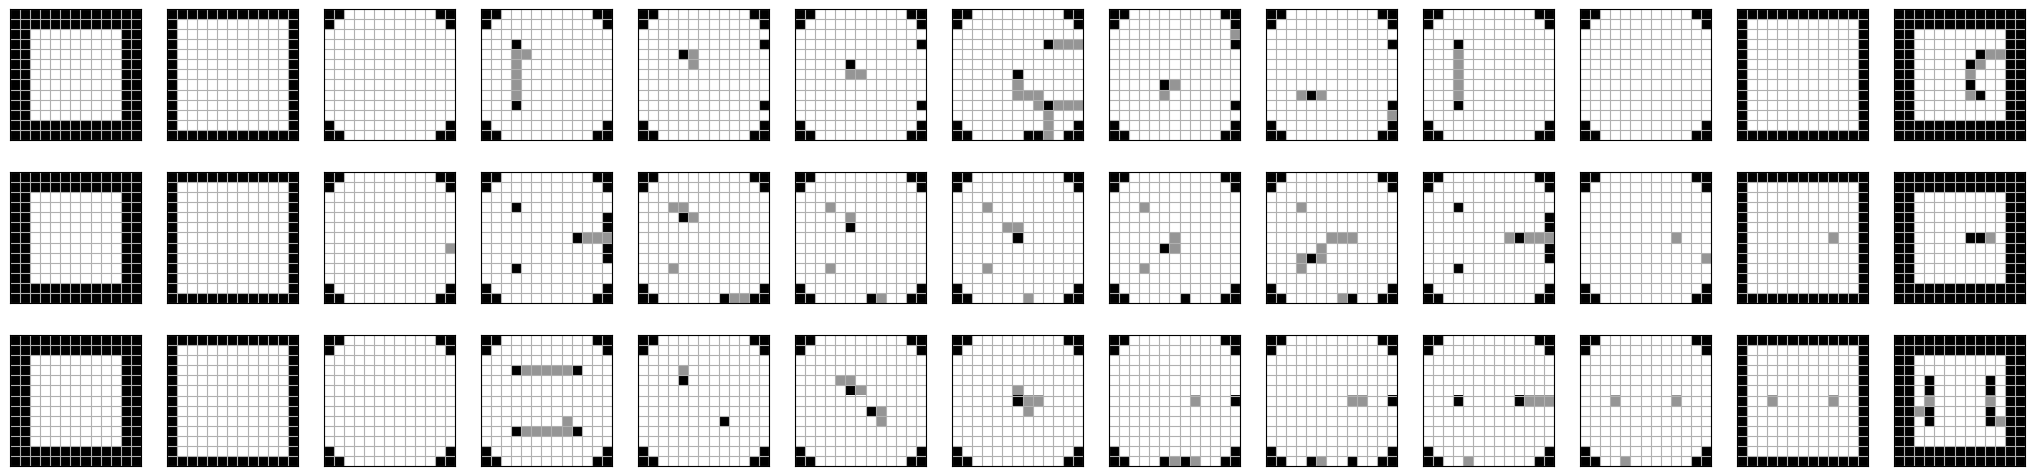

In [245]:
design_xyz_conn.add_frame(1)
display(design_xyz_conn.projections_fig())
display(design_xyz_conn.slices_fig())

In [247]:
voxart.save_stl_pair(design_xyz_conn, "/Users/priley/tmp/xyz_v3")

# add_frame

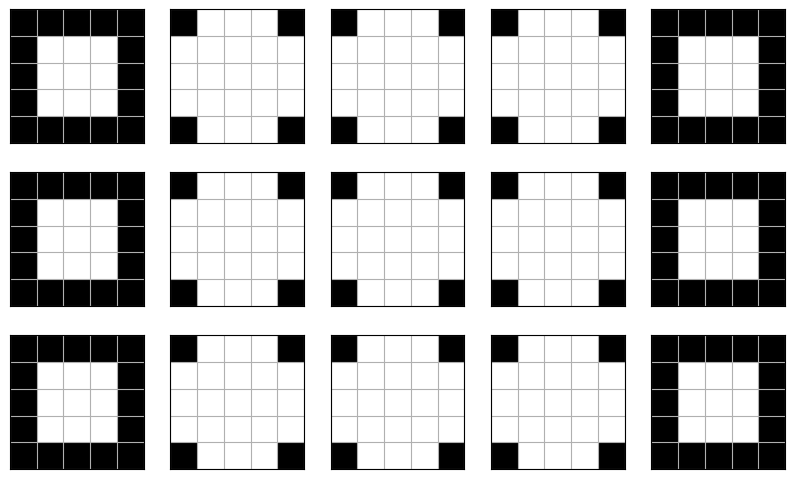

In [238]:
d = voxart.Design.from_size(5)
d.add_frame(offset=0)
d.slices_fig()

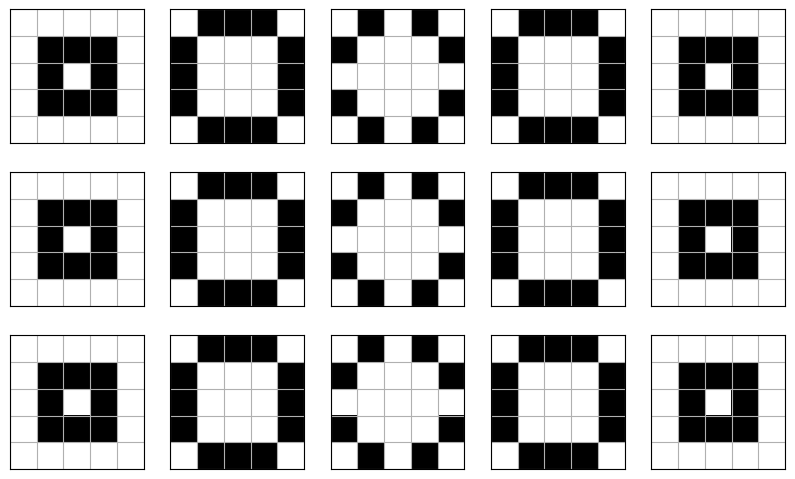

In [239]:
d = voxart.Design.from_size(5)
d.add_frame(offset=1)
d.slices_fig()

In [235]:
help(list.insert)

Help on method_descriptor:

insert(self, index, object, /)
    Insert object before index.



# Looking at goal_locations

In [34]:
goal_pfr = voxart.Goal.from_image(Image.open("../assets/pfr_13.png"))
goal_pfr.fig()
results = voxart.search(goal_pfr, "random_clear_front", num_iterations=50, top_n=50)
for i, (label, design) in enumerate(results.best()):
    print(design.goal_locations)
    if design.goal_locations != [0, 0, 0]:
        print(i)
        print(label)
        display(design.projections_fig())

  0%|          | 0/64 [00:00<?, ?it/s]

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


  0%|          | 0/50 [00:00<?, ?it/s]

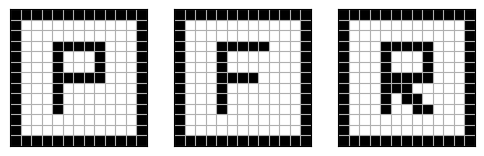

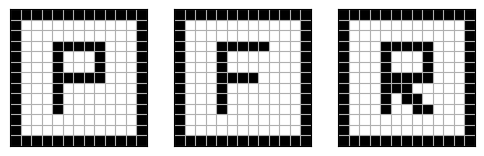

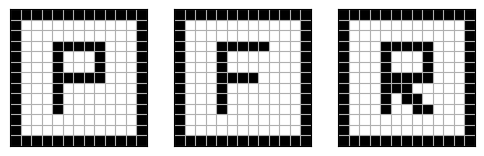

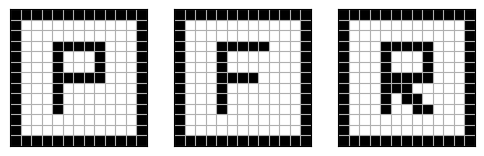

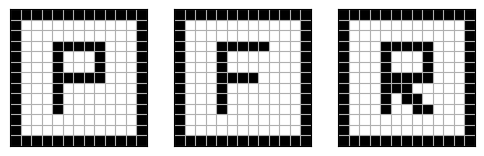

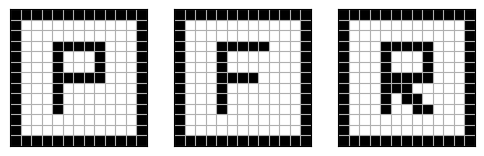

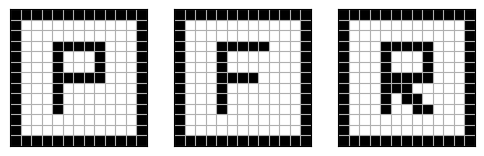

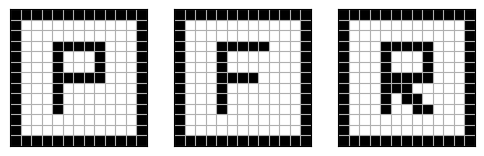

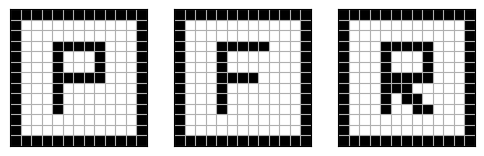

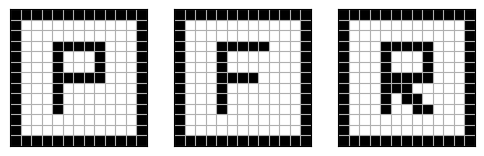

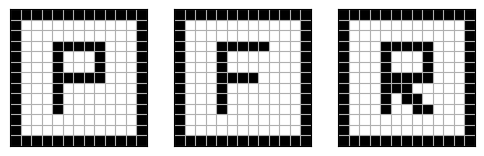

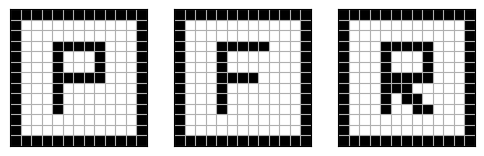

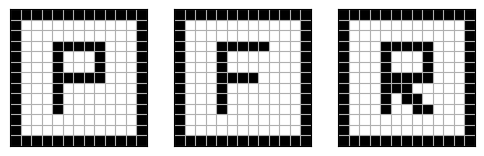

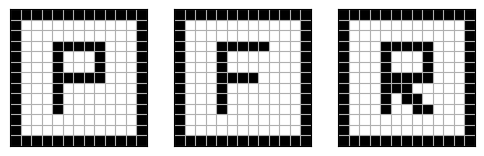

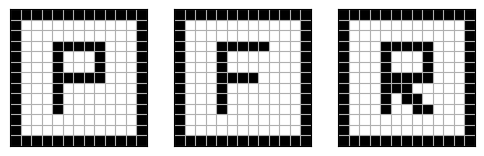

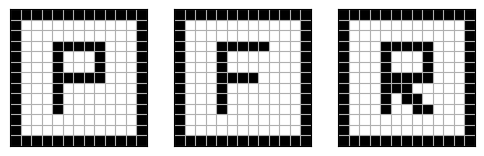

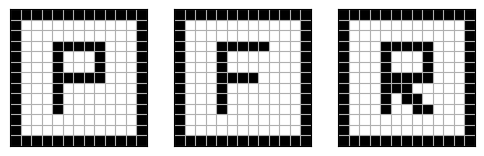

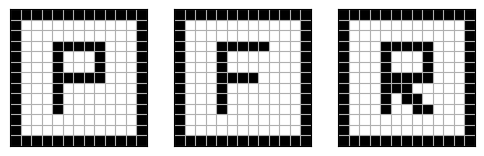

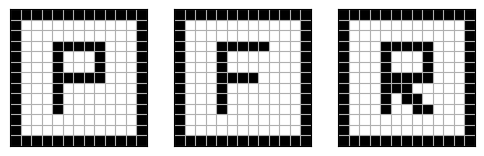

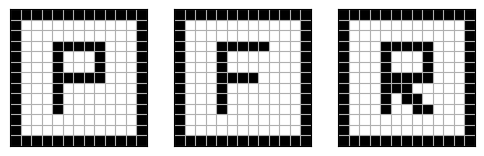

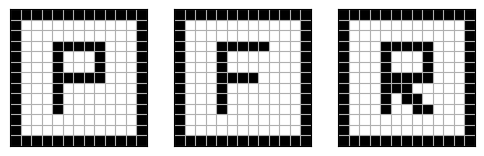

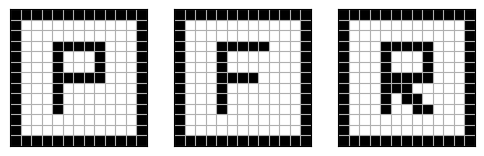

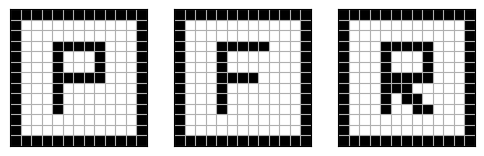

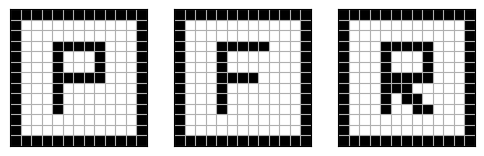

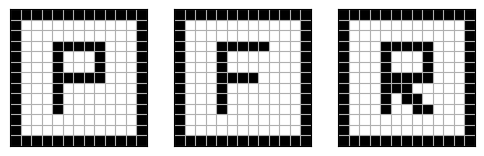

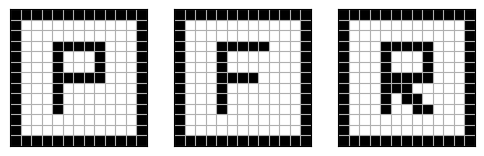

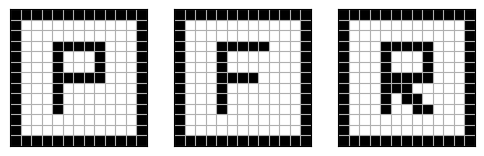

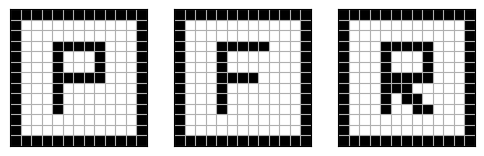

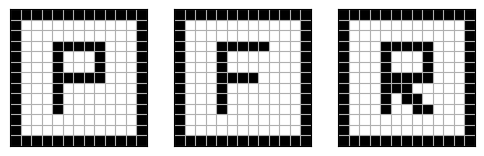

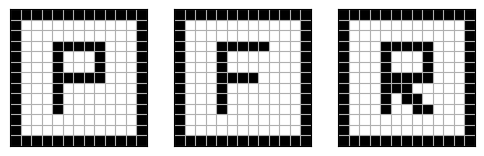

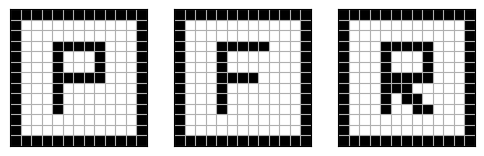

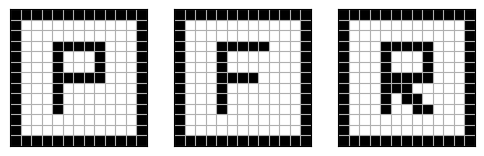

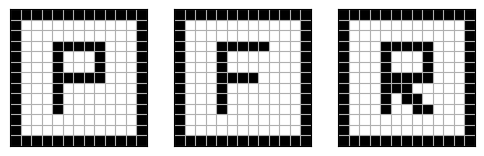

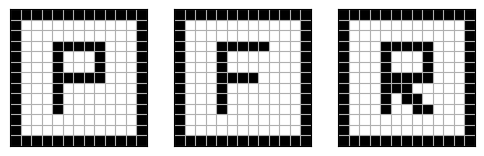

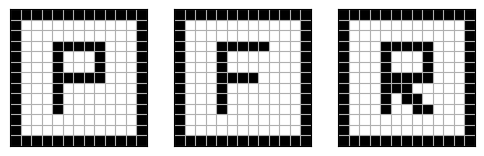

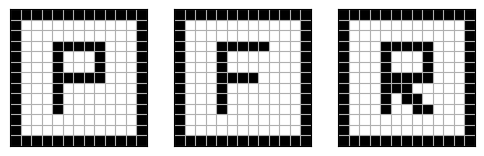

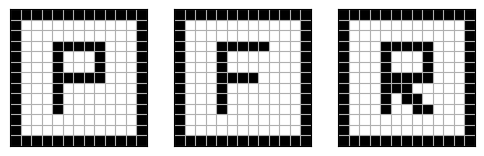

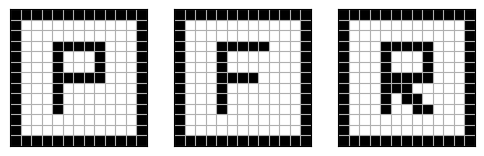

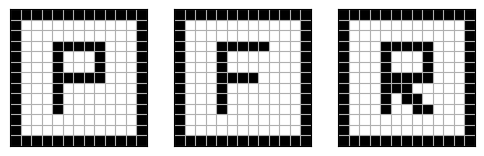

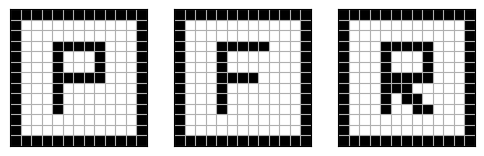

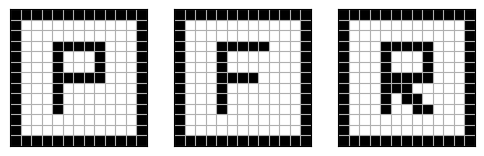

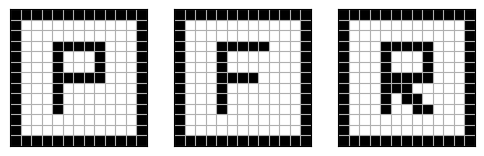

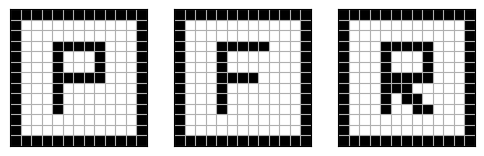

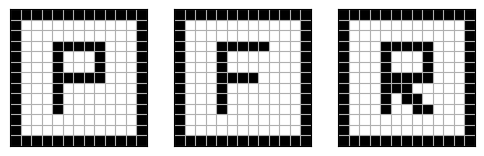

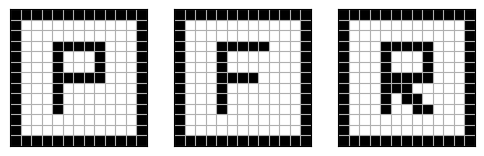

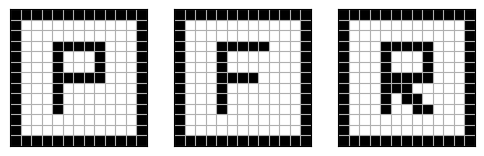

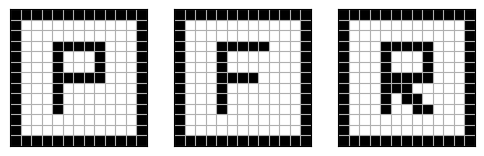

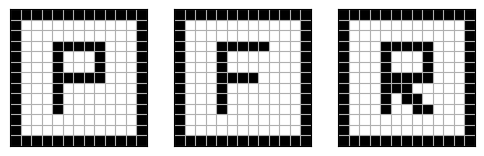

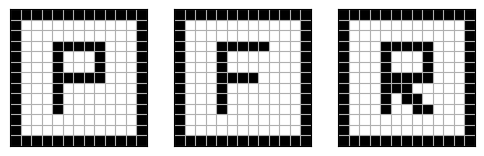

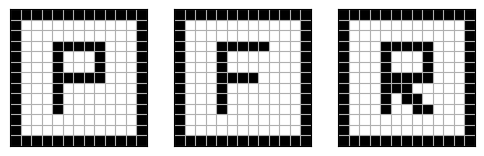

In [9]:
from tqdm.notebook import tqdm
for label, design in tqdm(results.best()):
    display(design.projections_fig())

In [4]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

# Playing with vector projections

In [209]:
origin = np.array([-20, 5., 5.])
far_pt = np.array([13., 1., 1.])
near_pt = np.array([0., 1., 1.])

In [210]:
rel_far_pt = far_pt - origin
rel_near_pt = near_pt - origin
norm_rel_far_pt = rel_far_pt / np.linalg.norm(rel_far_pt)
rel_proj = np.dot(rel_near_pt, norm_rel_far_pt) * norm_rel_far_pt
final = origin + rel_proj

In [211]:
print(origin)
print(far_pt, rel_far_pt, norm_rel_far_pt)
print(near_pt, rel_near_pt)
print(rel_proj, final)

[-20.   5.   5.]
[13.  1.  1.] [33. -4. -4.] [ 0.98562369 -0.11946954 -0.11946954]
[0. 1. 1.] [20. -4. -4.]
[20.37109723 -2.46922391 -2.46922391] [0.37109723 2.53077609 2.53077609]


In [222]:
def project_point(pt, projection_pt, origin_pt):
    proj_vec = projection_pt - origin_pt
    proj_vec = proj_vec / np.linalg.norm(proj_vec)
    return origin_pt + np.dot(pt - origin_pt, proj_vec) * proj_vec

In [224]:
project_point(near_pt, far_pt, [-20, 1., 1.])

array([0., 1., 1.])

In [225]:
project_point(near_pt, far_pt, [-20, 5., 5.])

array([0.37109723, 2.53077609, 2.53077609])

In [226]:
project_point(near_pt, far_pt, [-200, 5., 5.])

array([0.00916279, 1.24395938, 1.24395938])

In [227]:
project_point(near_pt, far_pt, [-2000, 5., 5.])

array([1.02660258e-04, 1.02583189e+00, 1.02583189e+00])

# Looking a Delaunay triangulation

In [ ]:
voxart.vox_to_triangles_delaunay((0, 0, 0))

In [7]:
import voxart.geometry
import scipy.spatial
voxart.geometry._VOX_VERTICES

array([[0, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 1],
       [1, 1, 1],
       [0, 1, 1]])

In [11]:
vox = (0, 0, 0)
vertices = np.array([np.array(v) + vox for v in voxart.geometry._VOX_VERTICES], dtype=float)
display(vertices.shape)
vertices

(8, 3)

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [0., 1., 1.]])

In [9]:
triang = scipy.spatial.Delaunay(vertices)
triang

In [10]:
for s in triang.simplices:
    print(s)

[6 3 4 0]
[6 2 1 0]
[6 4 1 0]
[6 3 2 0]
[6 5 4 1]
[6 7 3 4]


Argh, these give 4 point, not 3 point objects. I probably can't use this.

In [20]:
np.array([1, 2]).astype(float)

array([1., 2.])

In [21]:
np.asarray([1, 2], dtype=float)

array([1., 2.])

In [23]:
import stl
help(stl)

Help on package stl:

NAME
    stl

PACKAGE CONTENTS
    __about__
    base
    main
    mesh
    stl
    utils

CLASSES
    enum.Enum(builtins.object)
        stl.base.RemoveDuplicates
    enum.IntEnum(builtins.int, enum.Enum)
        stl.base.Dimension
        stl.stl.Mode
    stl.stl.BaseStl(stl.base.BaseMesh)
        stl.mesh.Mesh
    
    class Dimension(enum.IntEnum)
     |  Dimension(value, names=None, *, module=None, qualname=None, type=None, start=1)
     |  
     |  An enumeration.
     |  
     |  Method resolution order:
     |      Dimension
     |      enum.IntEnum
     |      builtins.int
     |      enum.Enum
     |      builtins.object
     |  
     |  Data and other attributes defined here:
     |  
     |  X = <Dimension.X: 0>
     |  
     |  Y = <Dimension.Y: 1>
     |  
     |  Z = <Dimension.Z: 2>
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors inherited from enum.Enum:
     |  
     |  name
     | 

In [24]:
help(stl.Mesh)

Help on class Mesh in module stl.mesh:

class Mesh(stl.stl.BaseStl)
 |  Mesh(*args, **kwargs)
 |  
 |  Method resolution order:
 |      Mesh
 |      stl.stl.BaseStl
 |      stl.base.BaseMesh
 |      python_utils.logger.Logged
 |      python_utils.logger.LoggerBase
 |      abc.ABC
 |      collections.abc.Mapping
 |      collections.abc.Collection
 |      collections.abc.Sized
 |      collections.abc.Iterable
 |      collections.abc.Container
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  __abstractmethods__ = frozenset()
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from stl.stl.BaseStl:
 |  
 |  get_header(self, name)
 |  
 |  save(self, filename, fh=None, mode=<Mode.AUTOMATIC: 0>, update_normals=True)
 |      Save the STL to a (binary) file
 |      
 |      If mode is :py:data:`AUTOMATIC` an :py:data:`ASCII` file will be
 |      written if the output is a TTY and a :py:data:`BINARY` file otherwi

In [26]:
mesh = stl.mesh.Mesh(data=)

TypeError: list indices must be integers or slices, not str

In [29]:
m = voxart.make_connector_strut_test_stl()
display(m)
m.save("/Users/priley/tmp/conn_strut.stl")

<Mesh: '' 84 vertices>

In [15]:
m

<Mesh: '' 12 vertices>

In [16]:
m.data

array([([0., 0., 0.], [[1.4       , 0.79289323, 2.2071068 ], [1.4       , 0.79289323, 0.79289323], [1.4       , 2.2071068 , 2.2071068 ]], [0]),
       ([0., 0., 0.], [[1.4       , 2.2071068 , 0.79289323], [1.4       , 2.2071068 , 2.2071068 ], [1.4       , 0.79289323, 0.79289323]], [0]),
       ([0., 0., 0.], [[1.4       , 2.2071068 , 0.79289323], [2.        , 2.2071068 , 0.79289323], [1.4       , 2.2071068 , 2.2071068 ]], [0]),
       ([0., 0., 0.], [[2.        , 2.2071068 , 2.2071068 ], [1.4       , 2.2071068 , 2.2071068 ], [2.        , 2.2071068 , 0.79289323]], [0]),
       ([0., 0., 0.], [[1.4       , 0.79289323, 0.79289323], [2.        , 0.79289323, 0.79289323], [1.4       , 2.2071068 , 0.79289323]], [0]),
       ([0., 0., 0.], [[2.        , 2.2071068 , 0.79289323], [1.4       , 2.2071068 , 0.79289323], [2.        , 0.79289323, 0.79289323]], [0]),
       ([0., 0., 0.], [[1.4       , 0.79289323, 2.2071068 ], [2.        , 0.79289323, 2.2071068 ], [1.4       , 0.79289323, 0.79289323]]

In [31]:
np.concatenate([None, np.array([1, 2])])

ValueError: zero-dimensional arrays cannot be concatenated

In [38]:
masks = voxart.Masks(design)
list(zip(*np.where(masks.edges)))

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 0, 10),
 (0, 0, 11),
 (0, 0, 12),
 (0, 1, 0),
 (0, 1, 12),
 (0, 2, 0),
 (0, 2, 12),
 (0, 3, 0),
 (0, 3, 12),
 (0, 4, 0),
 (0, 4, 12),
 (0, 5, 0),
 (0, 5, 12),
 (0, 6, 0),
 (0, 6, 12),
 (0, 7, 0),
 (0, 7, 12),
 (0, 8, 0),
 (0, 8, 12),
 (0, 9, 0),
 (0, 9, 12),
 (0, 10, 0),
 (0, 10, 12),
 (0, 11, 0),
 (0, 11, 12),
 (0, 12, 0),
 (0, 12, 1),
 (0, 12, 2),
 (0, 12, 3),
 (0, 12, 4),
 (0, 12, 5),
 (0, 12, 6),
 (0, 12, 7),
 (0, 12, 8),
 (0, 12, 9),
 (0, 12, 10),
 (0, 12, 11),
 (0, 12, 12),
 (1, 0, 0),
 (1, 0, 12),
 (1, 12, 0),
 (1, 12, 12),
 (2, 0, 0),
 (2, 0, 12),
 (2, 12, 0),
 (2, 12, 12),
 (3, 0, 0),
 (3, 0, 12),
 (3, 12, 0),
 (3, 12, 12),
 (4, 0, 0),
 (4, 0, 12),
 (4, 12, 0),
 (4, 12, 12),
 (5, 0, 0),
 (5, 0, 12),
 (5, 12, 0),
 (5, 12, 12),
 (6, 0, 0),
 (6, 0, 12),
 (6, 12, 0),
 (6, 12, 12),
 (7, 0, 0),
 (7, 0, 12),
 (7, 12, 0),
 (7, 12, 12),
 (8, 0, 0),
 (8, 0, 12),
 

In [40]:
not masks.edges[(1, 2, 3)]

True

In [7]:
goal7 = voxart.Goal.from_size(7)
goal7.add_frame()
goal7.fig()
goal7.to_image().save("../assets/empty7.png")

In [8]:
design = goal7.create_base_design()

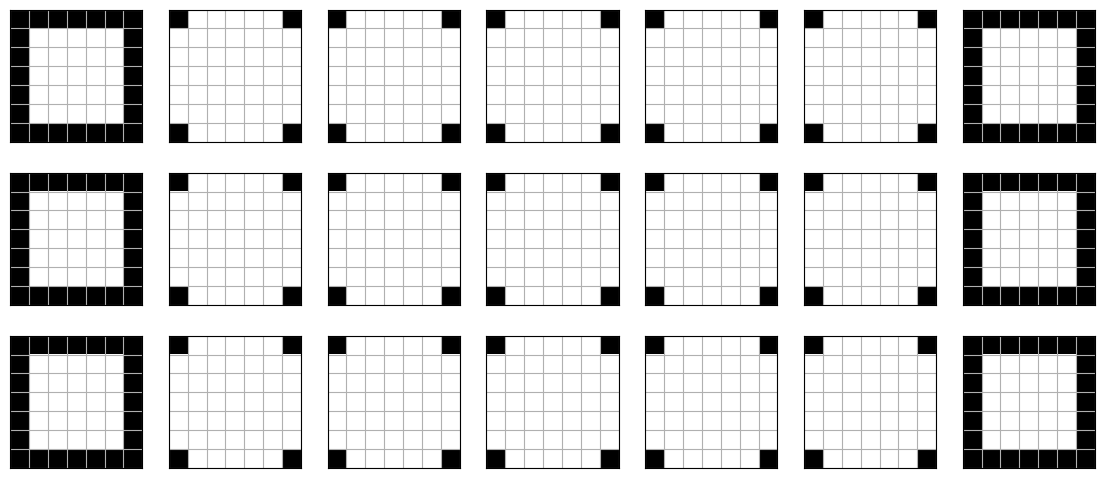

In [9]:
design.slices_fig()

In [11]:
base_stl = voxart.design_to_cube_stl(design, voxart.FILLED)
base_stl

<Mesh: '' 816 vertices>

In [13]:
dir(base_stl)

['_Logged__get_name',
 '_LoggerBase__get_name',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_areas',
 '_ascii_reader',
 '_centroids',
 '_get_or_update',
 '_load_ascii',
 '_load_binary',
 '_set',
 '_write_ascii',
 '_write_binary',
 'areas',
 'attr',
 'centroids',
 'check',
 'data',
 'debug',
 'dtype',
 'error',
 'exception',
 'from_3mf_file',
 'from_file',
 'from_files',
 'from_multi_file',
 'get',
 'get_header',
 'get_mass_properties',
 'get_mass_properties_with_density',
 'get_unit

In [15]:
base_stl.units

array([[ 0.,  0., -1.],
       [ 0.,  0., -1.],
       [ 0., -1.,  0.],
       ...,
       [-1., -0., -0.],
       [ 0., -0.,  1.],
       [-0.,  0.,  1.]], dtype=float32)

In [16]:
base_stl.vectors

array([[[0., 1., 0.],
        [1., 1., 0.],
        [0., 0., 0.]],

       [[1., 0., 0.],
        [0., 0., 0.],
        [1., 1., 0.]],

       [[1., 0., 0.],
        [1., 0., 1.],
        [0., 0., 0.]],

       ...,

       [[6., 7., 7.],
        [6., 7., 6.],
        [6., 6., 7.]],

       [[7., 6., 7.],
        [7., 7., 7.],
        [6., 6., 7.]],

       [[6., 7., 7.],
        [6., 6., 7.],
        [7., 7., 7.]]], dtype=float32)

In [17]:
base_stl.vectors * 10

array([[[ 0., 10.,  0.],
        [10., 10.,  0.],
        [ 0.,  0.,  0.]],

       [[10.,  0.,  0.],
        [ 0.,  0.,  0.],
        [10., 10.,  0.]],

       [[10.,  0.,  0.],
        [10.,  0., 10.],
        [ 0.,  0.,  0.]],

       ...,

       [[60., 70., 70.],
        [60., 70., 60.],
        [60., 60., 70.]],

       [[70., 60., 70.],
        [70., 70., 70.],
        [60., 60., 70.]],

       [[60., 70., 70.],
        [60., 60., 70.],
        [70., 70., 70.]]], dtype=float32)

In [18]:
base_stl.vectors = base_stl.vectors * 10

In [19]:
base_stl

<Mesh: '' 816 vertices>

# Getting coordinate frame right

In [93]:
chiral_array = np.pad([[2, 2, 0],
                       [2, 0, 0],
                       [2, 0, 0]],
                      pad_width=2)
chiral_array

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 2, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

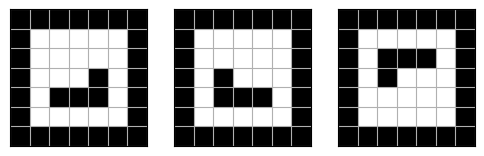

In [94]:
goal = voxart.Goal.from_arrays(chiral_array, chiral_array, chiral_array)
goal.add_frame()
goal.fig()

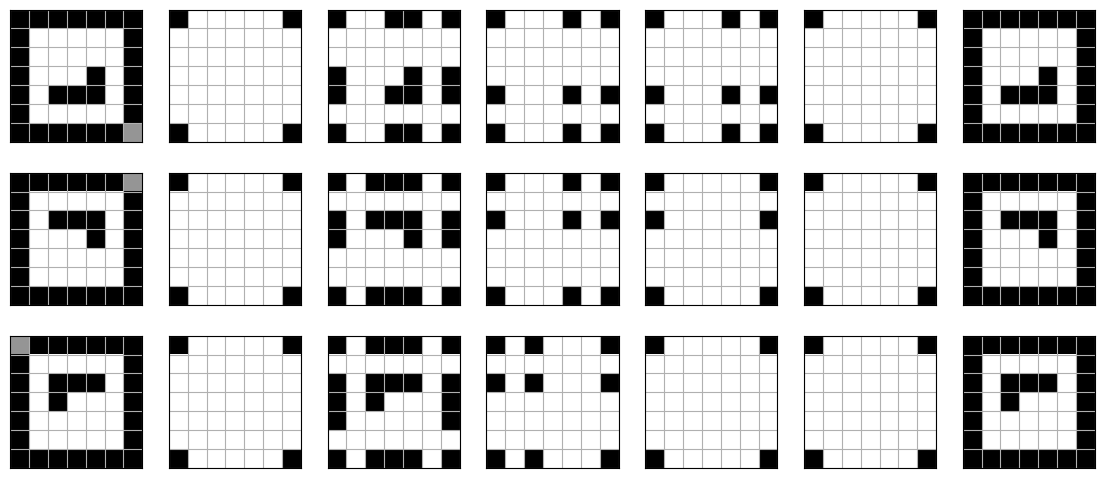

In [88]:
design = goal.create_base_design()
design.voxels[0, 0, 0] = voxart.CONNECTOR
design.slices_fig()

In [29]:
voxart.save_stl(design, "/Users/priley/tmp/frametest", connector_style="strut", separate_files=False)

In [32]:
!ls ../assets

chiral_7.png	     empty13.png  pfr_13.png
chiral_simple_7.png  empty7.png   xyz_13.png


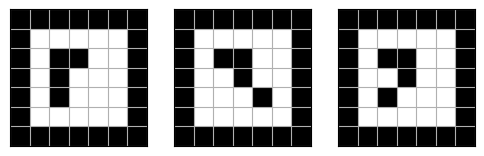

In [95]:
goal = voxart.Goal.from_image(Image.open("../assets/chiral_7.png"))
goal.add_frame()
goal.fig()

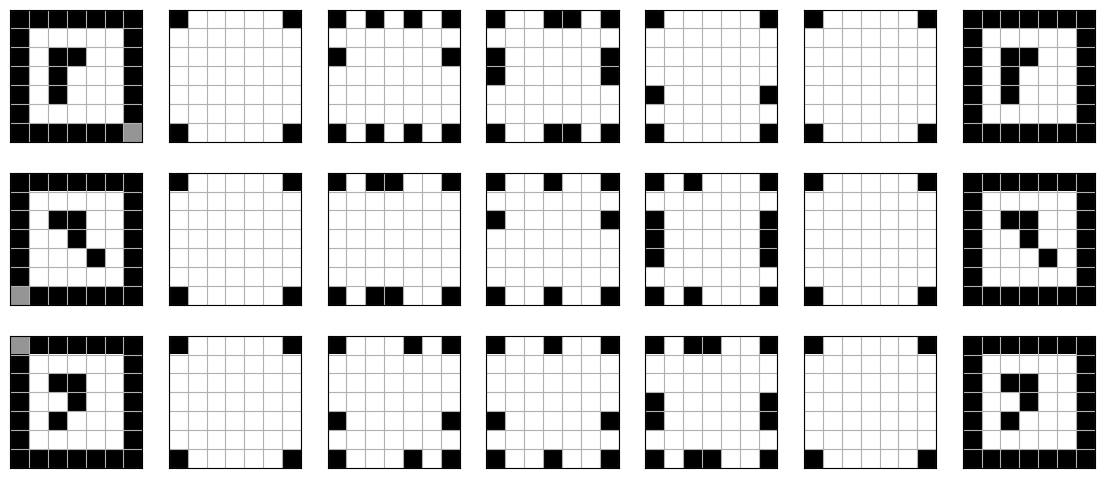

In [96]:
design = goal.create_base_design()
design.voxels[0, 0, 0] = voxart.CONNECTOR
design.voxels[voxart.Masks(design).interior] = voxart.EMPTY
design.slices_fig()

In [ ]:
# Documenting a stupid hack I did on the STL that didn't really work right, but gave me the answer I needed
# Which is that I basically have everything mirror imaged.
def stupid_hack_on_stl(mesh):
    mesh.vectors = -mesh.vectors
    shp = mesh.vectors.shape
    mn = np.min(np.reshape(mesh.vectors, [shp[0] * shp[1], shp[2]]), axis=0)
    mesh.vectors += mn


In [97]:
voxart.save_model_files(design, "/Users/priley/tmp/frametest5", connector_style="strut")

[2023-03-04 10:28:23.880026] [0x00007ff85e42c8c0] [trace]   Initializing StaticPrintConfigs
File exported to /Users/priley/tmp/frametest5.3mf


In [41]:
mesh = voxart.design_to_cube_stl(design, voxart.FILLED)

In [43]:
mesh.vectors.shape

(1116, 3, 3)

In [47]:
mesh.vectors[0:2, :, :]

array([[[0., 1., 1.],
        [1., 1., 1.],
        [0., 0., 1.]],

       [[1., 0., 1.],
        [0., 0., 1.],
        [1., 1., 1.]]], dtype=float32)

In [49]:
s = mesh.vectors.shape
np.reshape(mesh, [s[0] * s[1], s[2]]).shape

(3348, 3)

In [50]:
np.min(np.reshape(mesh, [s[0] * s[1], s[2]]), axis=0)

array([0., 0., 0.], dtype=float32)

In [57]:
design.voxels[:, 0, :]

array([[1, 2, 2, 2, 2, 2, 2],
       [2, 0, 0, 0, 0, 0, 2],
       [2, 0, 0, 0, 2, 0, 2],
       [2, 0, 0, 2, 0, 0, 2],
       [2, 0, 2, 2, 0, 0, 2],
       [2, 0, 0, 0, 0, 0, 2],
       [2, 2, 2, 2, 2, 2, 2]])

In [61]:
design.voxels[3, 0, :]

array([2, 0, 0, 2, 0, 0, 2])

In [63]:
design.slice(axis=1, idx=0)[4, 3]

2

# 3MF conversion

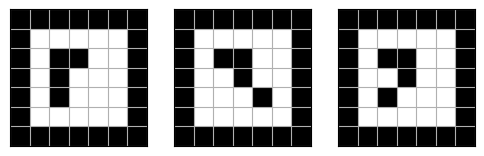

  0%|          | 0/64 [00:00<?, ?it/s]

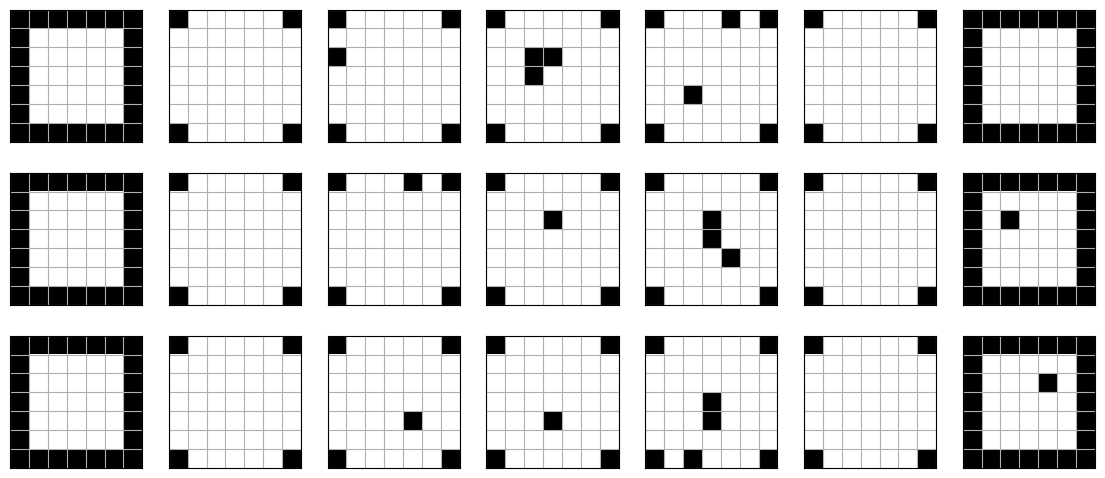

  0%|          | 0/1 [00:00<?, ?it/s]

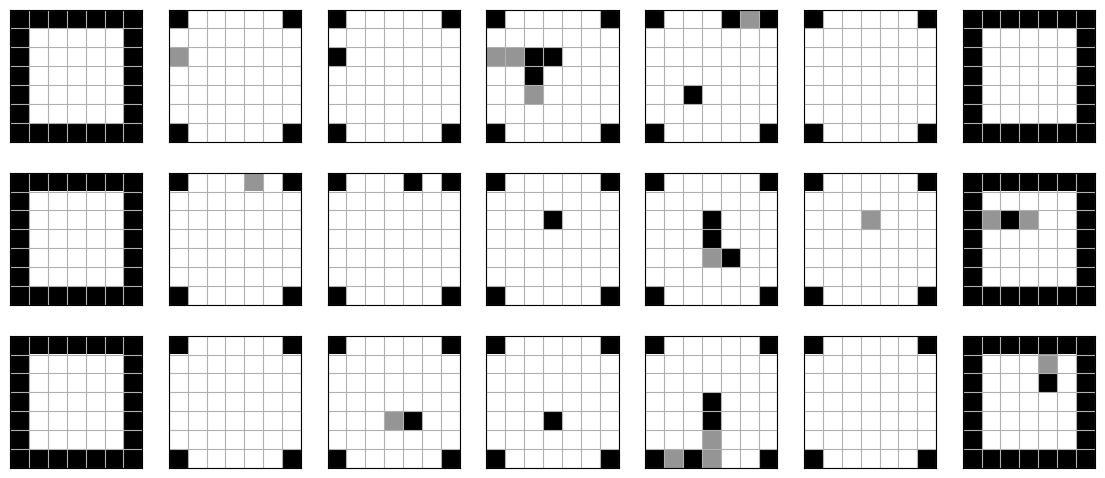

In [252]:
goal = voxart.Goal.from_image(Image.open("../assets/chiral_7.png"))
display(goal.fig())
results = voxart.search(goal, "random_clear_front", num_iterations=1, top_n=1)
design = results.best()[0][1]
display(design.slices_fig())
results_conn = voxart.search_connectors(design, num_iterations=1, top_n=1)
design_conn = results_conn.best()[0][1]
display(design_conn.slices_fig())

In [85]:
voxart.save_model_files(design_conn,
                        "/Users/priley/tmp/test_3mf",
                        connector_style="strut",
                        strut_width=0.5)
!ls /Users/priley/tmp/test_3mf*

[2023-03-04 09:48:22.504327] [0x00007ff85e42c8c0] [trace]   Initializing StaticPrintConfigs
File exported to /Users/priley/tmp/test_3mf.3mf
/Users/priley/tmp/test_3mf.3mf	/Users/priley/tmp/test_3mf_connector.stl
/Users/priley/tmp/test_3mf.stl	/Users/priley/tmp/test_3mf_filled.stl


In [103]:
import voxart.geometry as g
g._locate_prusa_slicer()

'/Applications/Original Prusa Drivers/PrusaSlicer.app/Contents/MacOS/PrusaSlicer'

# Rotations

In [108]:
def rotation_to_target(vec, target) -> scipy.spatial.transform.Rotation:
    cp = np.cross(vec, target)
    angle = np.arccos(np.dot(vec, target) / np.linalg.norm(vec) / np.linalg.norm(target))
    return scipy.spatial.transform.Rotation.from_rotvec(cp / np.linalg.norm(cp) * angle)

In [114]:
def test_rot(r, vecs):
    rotated = r.apply(vecs)
    for pre, post in zip (vecs, rotated):
        print(pre,
              np.linalg.norm(pre),
              " -> ",
              post,
              np.linalg.norm(post))

In [158]:
test_rot(rotation_to_target([10, 0, 0], [1, 1, 0]),
         [[1, 0, 0],
          [-1, 0, 0],
          [1, 0, 1],
          [-1, 0, 1],
          [1, 1, 0],
          [11, 1, 0],
         ])

[1, 0, 0] 1.0  ->  [0.70710678 0.70710678 0.        ] 1.0
[-1, 0, 0] 1.0  ->  [-0.70710678 -0.70710678  0.        ] 1.0
[1, 0, 1] 1.4142135623730951  ->  [0.70710678 0.70710678 1.        ] 1.4142135623730951
[-1, 0, 1] 1.4142135623730951  ->  [-0.70710678 -0.70710678  1.        ] 1.4142135623730951
[1, 1, 0] 1.4142135623730951  ->  [-2.22044605e-16  1.41421356e+00  0.00000000e+00] 1.4142135623730951
[11, 1, 0] 11.045361017187261  ->  [7.07106781 8.48528137 0.        ] 11.045361017187261


In [121]:
test_rot(rotation_to_target([1, 0, 0], [1, 1, 1]),
         [[1, 0, 0],
          [-1, 0, 0],
          [1, 0, 1],
          [-1, 0, 1],
          [1, 1, 0],
          [11, 1, 0],
         ])

[1, 0, 0] 1.0  ->  [0.57735027 0.57735027 0.57735027] 1.0
[-1, 0, 0] 1.0  ->  [-0.57735027 -0.57735027 -0.57735027] 1.0
[1, 0, 1] 1.4142135623730951  ->  [3.33066907e-16 3.66025404e-01 1.36602540e+00] 1.4142135623730951
[-1, 0, 1] 1.4142135623730951  ->  [-1.15470054 -0.78867513  0.21132487] 1.4142135623730951
[1, 1, 0] 1.4142135623730951  ->  [3.33066907e-16 1.36602540e+00 3.66025404e-01] 1.4142135623730951
[11, 1, 0] 11.045361017187261  ->  [5.77350269 7.1395281  6.1395281 ] 11.045361017187263


In [169]:
def random_test_rotation_to_target():
    rng = np.random.default_rng()
    for n in range(100):
        from_vec = rng.standard_normal(3)
        rot = rotation_to_target(from_vec, [10, 10, 10])
        got = rot.apply(from_vec)
        print(from_vec, got)
        if not np.all(np.isclose(got, got[0])):
            print("from_vec: ", from_vec)
            assert False
random_test_rotation_to_target()

[-1.55043005  1.68776133 -1.00350154] [1.44445918 1.44445918 1.44445918]
[ 0.38269938  0.04870679 -1.2695165 ] [0.7660512 0.7660512 0.7660512]
[-0.88166324 -0.038961   -0.01117127] [0.5095661 0.5095661 0.5095661]
[-1.53616402 -0.48214088 -1.46489973] [1.25674062 1.25674062 1.25674062]
[ 0.72031199  1.78331189 -0.3851084 ] [1.13245444 1.13245444 1.13245444]
[-0.81974935  0.79669168 -0.8832954 ] [0.83404984 0.83404984 0.83404984]
[ 0.58977738 -0.50878202 -0.35508929] [0.49422832 0.49422832 0.49422832]
[1.29469587 0.90194898 1.86614148] [1.41093744 1.41093744 1.41093744]
[-1.32737109  1.23942005 -0.33849759] [1.06656094 1.06656094 1.06656094]
[ 1.62892665 -0.51510026  0.16463509] [0.99093138 0.99093138 0.99093138]
[ 0.25510053  1.48751585 -0.16821895] [0.87675106 0.87675106 0.87675106]
[ 0.23318402 -0.83411799  1.15421252] [0.83313347 0.83313347 0.83313347]
[ 0.52404307  0.00980537 -0.18927144] [0.32173538 0.32173538 0.32173538]
[-1.08099885  1.04156127  0.13938897] [0.87040942 0.87040942

In [180]:
def random_test_rotation_to_zaxis():
    rng = np.random.default_rng()
    for n in range(100):
        from_vec = rng.standard_normal(3)
        rot = rotation_to_target(from_vec, [0, 0, 10])
        got = rot.apply(from_vec)
        print(from_vec, got)
        if not np.all(np.isclose(got[:2], 0)):
            print("from_vec: ", from_vec)
            assert False
random_test_rotation_to_zaxis()

[ 0.57517323 -0.90655158  0.54933269] [0.         0.         1.20599602]
[-0.87389847 -1.08638027  1.22651088] [ 1.38777878e-16 -1.11022302e-16  1.85694631e+00]
[-1.37545786  0.40783159  1.01854814] [-2.98372438e-16  1.66533454e-16  1.75944629e+00]
[-0.42379229  0.54390403 -0.84709916] [-2.22044605e-16  2.91433544e-16  1.09224928e+00]
[-0.45133347  1.11644921  0.51447132] [2.77555756e-17 1.11022302e-16 1.30951956e+00]
[-0.95434056 -0.07658018 -0.14240941] [-1.72604986e-16 -1.38777878e-17  9.67941560e-01]
[-0.01526164 -0.63951105  0.23702644] [0.00000000e+00 8.32667268e-17 6.82194135e-01]
[-0.06521791 -0.1042797   0.41330904] [-4.29344060e-17 -6.93889390e-17  4.31221517e-01]
[-1.65060807 -0.2578584  -0.13741399] [-8.04911693e-16 -1.66533454e-16  1.67626983e+00]
[ 0.46443417 -1.30188533 -1.25680347] [ 1.11022302e-16 -2.22044605e-16  1.86819685e+00]
[-2.06858316  0.96987584 -1.97814719] [ 2.22044605e-16 -2.22044605e-16  3.02204596e+00]
[ 0.91821525 -0.49004766  0.56734891] [ 2.49800181e-1

In [123]:
m = voxart.design_to_cube_stl(design, voxart.FILLED)

In [217]:
def transform_mesh_to_stand_on_point(m, bottom_idx, scale):
    bottom_pt = np.asarray(bottom_idx) * scale
    m.vectors -= bottom_pt
    rot_from_pt = np.array([1 if vi == 0 else 0 for vi in bottom_idx]) * scale - bottom_pt
    print(rot_from_pt)
    rot = rotation_to_target(rot_from_pt, [0, 0, 1])
    m.vectors = np.array([rot.apply(tri) for tri in m.vectors])
    return m

In [139]:
m.vectors.shape

(1092, 3, 3)

In [140]:
x = np.array([0, 10])
x / x

/var/folders/06/hmgfyb_d5076hlrrhyncy5vc0000gq/T/ipykernel_88171/3782179865.py:2: RuntimeWarning: invalid value encountered in divide
  x / x


array([nan,  1.])

In [141]:
np.array([0 if vi == 0 else 1 for vi in x])

array([0, 1])

In [170]:
def check_pos_z(m):
    cnt = np.sum(m.vectors[:, :, 2] < 0)
    print("From shape", m.vectors.shape, "found", cnt, "negative Z vectors")

In [218]:
new_mesh = transform_mesh_to_stand_on_point(voxart.design_to_cube_stl(design, voxart.FILLED), 
                                           [1, 1, 0],
                                           design.size)
check_pos_z(new_mesh)
new_mesh.save("/Users/priley/tmp/rotated30.stl", mode=stl.Mode.ASCII)

[-7 -7  7]
From shape (1092, 3, 3) found 0 negative Z vectors


In [219]:
new_mesh = transform_mesh_to_stand_on_point(voxart.design_to_cube_stl(design, voxart.FILLED), 
                                            [0, 0, 0],
                                            design.size)
check_pos_z(new_mesh)
new_mesh.save("/Users/priley/tmp/rotated31.stl", mode=stl.Mode.ASCII)

[7 7 7]
From shape (1092, 3, 3) found 0 negative Z vectors


In [220]:
new_mesh = transform_mesh_to_stand_on_point(voxart.design_to_cube_stl(design, voxart.FILLED),
                                            [1, 1, 1],
                                            design.size)
check_pos_z(new_mesh)
new_mesh.save("/Users/priley/tmp/rotated32.stl", mode=stl.Mode.ASCII)

[-7 -7 -7]
From shape (1092, 3, 3) found 0 negative Z vectors


In [176]:
import stl
new_mesh.save("/Users/priley/tmp/rotated3.stl", mode=stl.Mode.ASCII)

In [161]:
new_mesh.vectors[:, :, 2]

array([[ 1.1547005 ,  0.57735026,  1.7320508 ],
       [ 1.1547005 ,  1.7320508 ,  0.57735026],
       [ 1.1547005 ,  1.7320508 ,  1.7320508 ],
       ...,
       [-2.309401  , -2.8867514 , -1.7320508 ],
       [-2.309401  , -2.8867514 , -1.7320508 ],
       [-2.309401  , -1.7320508 , -2.8867514 ]], dtype=float32)

In [233]:
def transform_mesh_to_stand_on_point_v2(m, bottom_idx, scale):
    bottom_pt = np.asarray(bottom_idx) * scale
    m.vectors -= bottom_pt
    rot_from_pt = np.array([1 if vi == 0 else 0 for vi in bottom_idx]) * scale - bottom_pt
    print(rot_from_pt)
    target = np.array([0, 0, 1])
    cp = np.cross(rot_from_pt, target)
    angle = np.arccos(np.dot(rot_from_pt, target) / np.linalg.norm(rot_from_pt))
    m.rotate(axis=-cp, theta=angle)
    #return scipy.spatial.transform.Rotation.from_rotvec(cp / np.linalg.norm(cp) * angle)
    #print(rot_from_pt)
    #rot = rotation_to_target(rot_from_pt, [0, 0, 1])
    #m.vectors = np.array([rot.apply(tri) for tri in m.vectors])
    return m

In [234]:
new_mesh = transform_mesh_to_stand_on_point_v2(voxart.design_to_cube_stl(design, voxart.FILLED), 
                                               [1, 1, 0],
                                               design.size)
check_pos_z(new_mesh)
new_mesh.save("/Users/priley/tmp/rotated40.stl", mode=stl.Mode.ASCII)

[-7 -7  7]
From shape (1092, 3, 3) found 0 negative Z vectors


In [235]:
new_mesh = transform_mesh_to_stand_on_point_v2(voxart.design_to_cube_stl(design, voxart.FILLED), 
                                               [0, 0, 0], 
                                               design.size)
check_pos_z(new_mesh)
new_mesh.save("/Users/priley/tmp/rotated41.stl", mode=stl.Mode.ASCII)

[7 7 7]
From shape (1092, 3, 3) found 0 negative Z vectors


In [236]:
new_mesh = transform_mesh_to_stand_on_point_v2(voxart.design_to_cube_stl(design, voxart.FILLED), 
                                               [1, 1, 1], 
                                               design.size)
check_pos_z(new_mesh)
new_mesh.save("/Users/priley/tmp/rotated42.stl", mode=stl.Mode.ASCII)

[-7 -7 -7]
From shape (1092, 3, 3) found 0 negative Z vectors


In [245]:
new_mesh = transform_mesh_to_stand_on_point_v2(voxart.design_to_cube_stl(design, voxart.FILLED), 
                                               [0, 0, 1], 
                                               design.size)
check_pos_z(new_mesh)
new_mesh.save("/Users/priley/tmp/rotated43.stl", mode=stl.Mode.ASCII)

[ 7  7 -7]
From shape (1092, 3, 3) found 0 negative Z vectors


In [202]:
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(new_mesh.vectors))

# Auto scale to the mesh size
scale = np.concatenate(new_mesh).flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

<Figure size 640x480 with 0 Axes>

In [155]:
help(new_mesh.save)

Help on method save in module stl.stl:

save(filename, fh=None, mode=<Mode.AUTOMATIC: 0>, update_normals=True) method of stl.mesh.Mesh instance
    Save the STL to a (binary) file
    
    If mode is :py:data:`AUTOMATIC` an :py:data:`ASCII` file will be
    written if the output is a TTY and a :py:data:`BINARY` file otherwise.
    
    :param str filename: The file to load
    :param file fh: The file handle to open
    :param int mode: The mode to write, default is :py:data:`AUTOMATIC`.
    :param bool update_normals: Whether to update the normals



In [181]:
help(new_mesh.rotate)

Help on method rotate in module stl.base:

rotate(axis, theta=0, point=None) method of stl.mesh.Mesh instance
    Rotate the matrix over the given axis by the given theta (angle)
    
    Uses the :py:func:`rotation_matrix` in the background.
    
    .. note:: Note that the `point` was accidentaly inverted with the
       old version of the code. To get the old and incorrect behaviour
       simply pass `-point` instead of `point` or `-numpy.array(point)` if
       you're passing along an array.
    
    :param numpy.array axis: Axis to rotate over (x, y, z)
    :param float theta: Rotation angle in radians, use `math.radians` to
                        convert degrees to radians if needed.
    :param numpy.array point: Rotation point so manual translation is not
                              required



In [242]:
np.array([0, 1.0, 0.2, 0.5, 0.8, 0.9999999, 1.2], dtype=np.int32)

array([0, 1, 0, 0, 0, 0, 1], dtype=int32)

In [244]:
(np.array([0, 1, 1]) + 1) % 2

array([1, 0, 0])

Now let's test the with the actual library code

In [255]:
design_conn.bottom_location = [1, 1, 0]
voxart.save_model_files(design_conn, "/Users/priley/tmp/rotated_final", connector_style="strut", scale=5)

[2023-03-05 20:02:17.353480] [0x00007ff85e42c8c0] [trace]   Initializing StaticPrintConfigs
File exported to /Users/priley/tmp/rotated_final.3mf


# How to mark the bottom_location

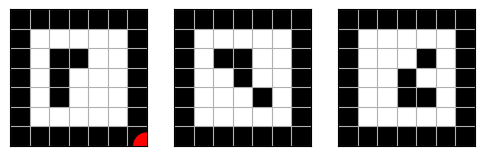

In [273]:
import matplotlib as mpl
fig = design.projections_fig()
ax = fig.axes[0]

ax.add_patch(mpl.patches.Circle((1, 0), 0.1, transform=ax.transAxes,
                       facecolor='red', alpha=1))

fig

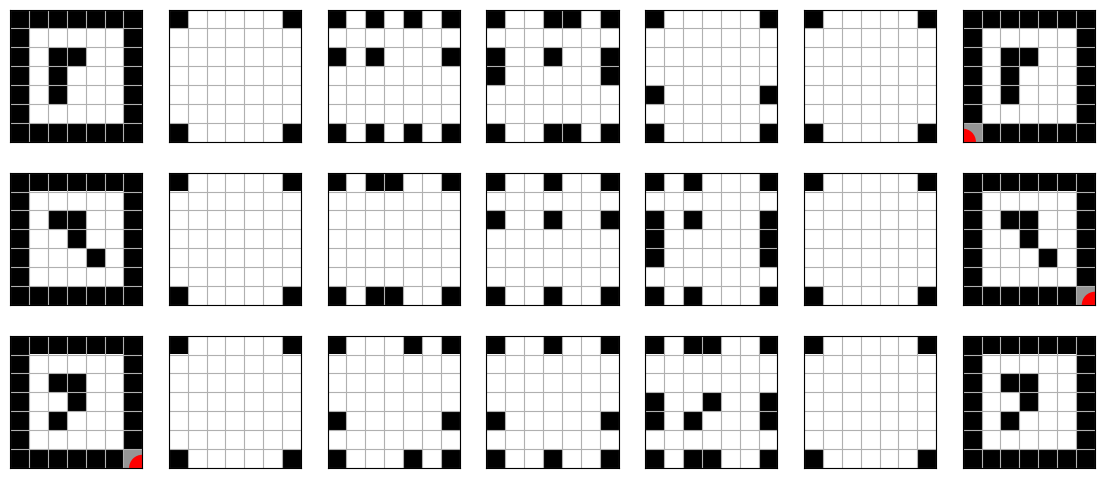

In [301]:
goal = voxart.Goal.from_image(Image.open("../assets/chiral_7.png"))
design = goal.create_base_design()
loc = np.array([1, 1, 0])
design.voxels[tuple(loc * (design.size - 1))] = voxart.CONNECTOR
design.bottom_location = loc
display(design.slices_fig())


In [289]:
voxart.save_model_files(design, "/Users/priley/tmp/test_marked_bottom")

[2023-03-07 19:24:10.228141] [0x00007ff85e42c8c0] [trace]   Initializing StaticPrintConfigs
File exported to /Users/priley/tmp/test_marked_bottom.3mf


In [286]:
x = np.array([1, 2, 3, 4])
x[np.array([1, 2])]

array([2, 3])

In [11]:
x = (1, 2, 3)
y = (10, 11)
(*x,'mid',*y)

(1, 2, 3, 'mid', 10, 11)

In [12]:
['foo', *[i + 100 for i in x]]

['foo', 101, 102, 103]

In [18]:
round(3.9)

4

# Testing new search

In [127]:
goal = voxart.Goal.from_image(Image.open("../assets/chiral_7.png"))

In [148]:
opts = voxart.SearchOptions()
opts.filled_num_batches = 2
opts.connector_num_iterations_per = 50

In [149]:
filled_results, results = voxart.search(goal, opts)

SearchOptions(filled_batch_size=3, filled_num_batches=2, filled_strategy='random_clear_front', filled_num_to_pursue=20, connector_num_iterations_per=50, connector_frac=0.4, top_n=20, obj_func=None)


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

In [150]:
df_filled_results = filled_results.all_objective_values()
display(df_filled_results.sample(5))
df_results = results.all_objective_values()
df_results.sample(10)

,batch_idx,idx_in_batch,filled_form_idx,filled_is_starting,filled_iteration,filled_is_unique,filled_uid,objective_value,objective_value_rank
5,0,5,37,False,0,True,4,19.4,0
11,0,11,2,False,2,False,1,19.4,0
4,0,4,29,False,2,False,2,19.4,0
6,0,6,37,False,2,False,4,19.4,0
21,1,1,2,False,1,False,1,19.4,0


,batch_idx,idx_in_batch,filled_form_idx,filled_is_starting,filled_iteration,filled_is_unique,filled_uid,idx_in_connector,conn_iteration,conn_num_connectors,idx_in_bottom_location,bottom_location,is_unique,uid,objective_value,objective_value_rank
774,0,5,37,False,0,True,4,16,4,8,6,"(1, 0, 1)",True,670,35.0,1017
973,0,10,43,False,0,True,6,1,28,7,5,"(1, 0, 0)",True,861,32.1,608
1108,0,10,43,False,0,True,6,18,33,8,4,"(0, 0, 1)",True,948,31.2,510
832,0,8,38,False,0,True,5,4,4,6,0,"(1, 0, 1)",True,728,27.3,32
908,0,8,38,False,0,True,5,13,13,6,4,"(0, 0, 1)",True,804,31.1,450
995,0,10,43,False,0,True,6,4,15,7,3,"(1, 0, 1)",True,883,32.1,608
704,0,5,37,False,0,True,4,8,1,8,0,"(0, 0, 1)",True,600,31.2,510
92,0,0,3,False,1,True,0,11,3,7,4,"(0, 0, 0)",True,84,32.1,608
1033,0,10,43,False,0,True,6,9,44,7,1,"(0, 1, 1)",False,849,30.2,306
987,0,10,43,False,0,True,6,3,30,7,3,"(0, 0, 0)",True,875,32.1,608


In [151]:
df_results.head(75)

,batch_idx,idx_in_batch,filled_form_idx,filled_is_starting,filled_iteration,filled_is_unique,filled_uid,idx_in_connector,conn_iteration,conn_num_connectors,idx_in_bottom_location,bottom_location,is_unique,uid,objective_value,objective_value_rank
0,0,0,3,False,1,True,0,0,17,6,0,"(0, 0, 1)",True,0,27.3,32
1,0,0,3,False,1,True,0,0,17,6,1,"(1, 1, 1)",True,1,29.2,189
2,0,0,3,False,1,True,0,0,17,6,2,"(0, 1, 1)",True,2,29.2,189
3,0,0,3,False,1,True,0,0,17,6,3,"(1, 0, 1)",True,3,29.2,189
4,0,0,3,False,1,True,0,0,17,6,4,"(1, 1, 0)",True,4,29.2,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,3,False,1,True,0,8,29,7,6,"(1, 0, 1)",True,62,32.1,608
71,0,0,3,False,1,True,0,8,29,7,7,"(1, 0, 0)",True,63,34.0,936
72,0,0,3,False,1,True,0,9,30,7,0,"(1, 1, 0)",True,64,30.2,306
73,0,0,3,False,1,True,0,9,30,7,1,"(0, 0, 1)",True,65,30.2,306


In [152]:
df_results["filled_is_starting"].value_counts()

False    1120
Name: filled_is_starting, dtype: int64

(array([ 32.,  30., 199., 189., 158., 323.,  78.,  96.,  14.,   1.]),
 array([25.4 , 26.74, 28.08, 29.42, 30.76, 32.1 , 33.44, 34.78, 36.12,
        37.46, 38.8 ]),
 <BarContainer object of 10 artists>)

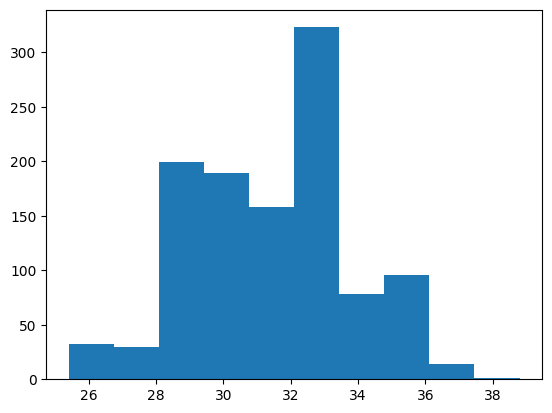

In [153]:
plt.hist(df_results["objective_value"])

(array([130., 107., 213.,   0., 139., 207.,   0., 135.,  78., 111.]),
 array([   0. ,  111.9,  223.8,  335.7,  447.6,  559.5,  671.4,  783.3,
         895.2, 1007.1, 1119. ]),
 <BarContainer object of 10 artists>)

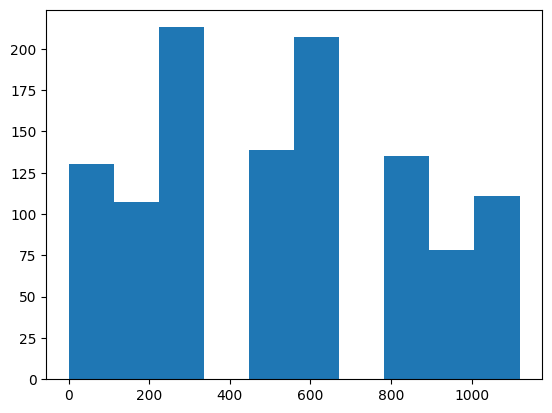

In [154]:
plt.hist(df_results["objective_value_rank"])

(array([160., 160.,   0., 160.,   0., 160., 160.,   0., 160., 160.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

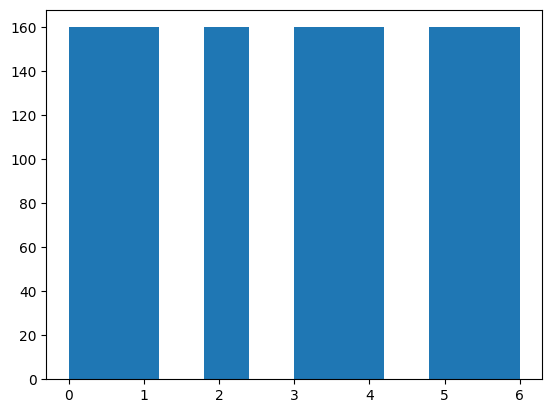

In [155]:
plt.hist(df_results["filled_uid"])

(array([128., 120., 112.,  96.,  96.,  96., 128.,  96., 144., 104.]),
 array([  0. ,  95.9, 191.8, 287.7, 383.6, 479.5, 575.4, 671.3, 767.2,
        863.1, 959. ]),
 <BarContainer object of 10 artists>)

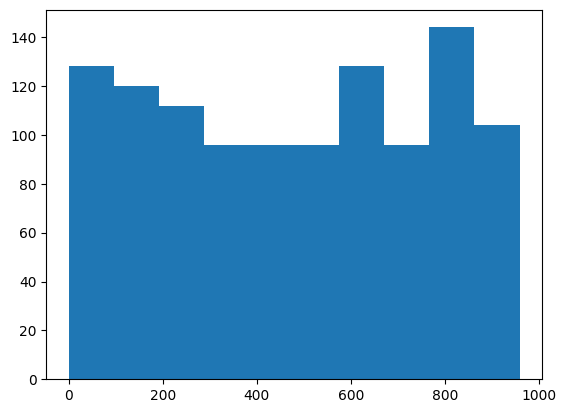

In [156]:
plt.hist(df_results["uid"])

In [157]:
df_results["filled_form_idx"].value_counts()

3     160
2     160
29    160
13    160
37    160
38    160
43    160
Name: filled_form_idx, dtype: int64

In [158]:
_, design = results.best()[0]
voxart.save_model_files(design, "/Users/priley/tmp/test_chiral")

[2023-03-24 10:15:05.049261] [0x00007ff85e42c8c0] [trace]   Initializing StaticPrintConfigs
File exported to /Users/priley/tmp/test_chiral.3mf
[2023-03-24 10:15:05.468205] [0x00007ff85e42c8c0] [trace]   Initializing StaticPrintConfigs
File exported to /Users/priley/tmp/test_chiral.obj


Ideas for visualizaitons

* Preprocessing
   * Add overall rank by objective_value
   * Add order processed index (based on batch_idx, form_idx, filled_iteration, conn_iteration, idx_in_bottom_location
* To look at overall distributions of objective values
   * For filled only and complete, ecdfs + histograms of objective values
   * distribution of the numbers of ties
* To look at form indices
   * Among best N, what is the distribution of filled_form_idx
   * For each filled_form_idx, what's the distribution of scores
* To see if we need more iterations in filled searching
   * Number of unique/not-unique as a function of batch_idx,filled_iteration
* To see if we need more batches
   * Number of filled_is_unique per batch (or maybe as a fraction?). Need to reduce to batch_idx, idx_in_batch
* To see how being good in a batch is related to being good at the end (may affect hwo deep to go in batches)
   * scatter plot of the idx_in_batch and the final rank
      * maybe restrict to idx_in_bottom_location == 0
* To see if we are trying enough random iterations for connectors
   * Number unique/not-unique for each conn_iteration
      * Maybe restrict to idx_in_bottom_location == 0
   * Scatter plot of conn_iterations and rank / objective_value
* Big picture progress
   * objective_value vs. order processed (along with a min)

In [159]:
df_results.sample(3)

,batch_idx,idx_in_batch,filled_form_idx,filled_is_starting,filled_iteration,filled_is_unique,filled_uid,idx_in_connector,conn_iteration,conn_num_connectors,idx_in_bottom_location,bottom_location,is_unique,uid,objective_value,objective_value_rank
290,0,1,2,False,1,True,1,16,31,5,2,"(1, 0, 0)",True,234,28.2,62
934,0,8,38,False,0,True,5,16,16,6,6,"(0, 1, 1)",True,822,33.0,796
145,0,0,3,False,1,True,0,18,10,7,1,"(0, 1, 1)",True,113,30.2,306


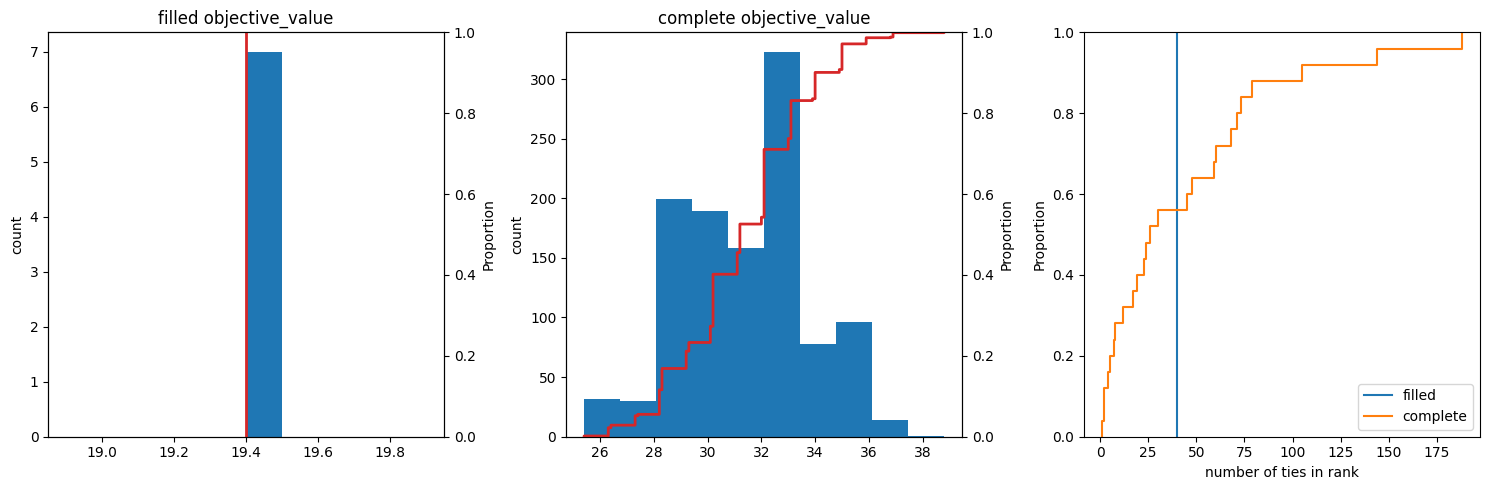

In [195]:
def _ecdf_plus_hist(ax, vals, color):
    ax.hist(vals, color="tab:blue")
    ax.set_ylabel("count")
    ax2 = ax.twinx()
    sns.ecdfplot(ax=ax2, data=vals, color="tab:red", lw=2)

def _ties_plot(ax, vals, label):
    #data = vals.value_counts().value_counts()
    #ax.bar(data.index, data, label=label)
    sns.ecdfplot(ax=ax, data=vals.value_counts(), label=label)
    ax.set_xlabel("number of ties in rank")
    
def objective_distributions_plot(df_filled_results, df_results):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    ax = axes[0]
    _ecdf_plus_hist(ax, df_filled_results.loc[df_filled_results["filled_is_unique"], "objective_value"],
                  color="b")
    ax.set_title("filled objective_value")

    ax = axes[1]
    _ecdf_plus_hist(ax, df_results["objective_value"],
                  color="g")
    ax.set_title("complete objective_value")
    
    ax = axes[2]
    _ties_plot(ax, df_filled_results["objective_value_rank"], label="filled")
    _ties_plot(ax, df_results["objective_value_rank"], label="complete")
    ax.legend()
    
    fig.tight_layout()
    plt.close()
    return fig

objective_distributions_plot(df_filled_results, df_results)

In [ ]:
df_results["objective_value_rank"].value_counts().sort_index()

In [189]:
df_results["objective_value_rank"].value_counts().value_counts().sort_index()

1      1
2      2
4      1
5      1
7      1
8      1
12     1
17     1
19     1
23     1
24     1
26     1
30     1
45     1
48     1
59     1
60     1
68     1
71     1
73     1
79     1
105    1
144    1
188    1
Name: objective_value_rank, dtype: int64

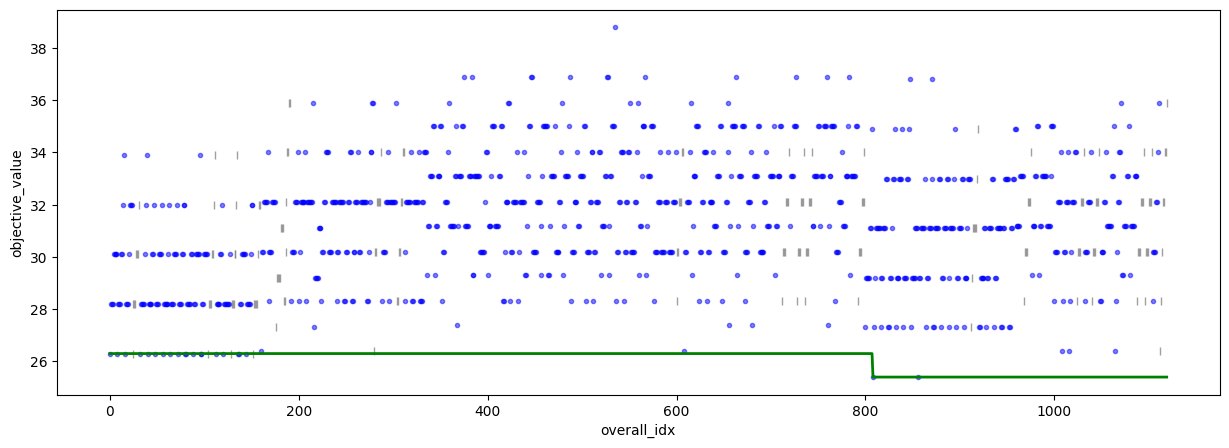

In [160]:
def overall_progress_plot(df_results):
    df_results = results.all_objective_values().sort_values(["batch_idx", "filled_form_idx", "filled_iteration", "conn_iteration", "idx_in_bottom_location"])
    df_results["idx_overall"] = np.arange(len(df_results))

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    df = df_results[~df_results["is_unique"]]
    ax.plot(df["idx_overall"], df["objective_value"], color="gray", linestyle="", marker="|", alpha=0.75)
    df = df_results[df_results["is_unique"]]
    ax.plot(df["idx_overall"], df["objective_value"], color="b", linestyle="", marker=".", alpha=0.5)
    ax.plot(df_results["idx_overall"], df_results["objective_value"].cummin(), color="g", marker="", lw=2)
    ax.set_xlabel("overall_idx")
    ax.set_ylabel("objective_value")
    plt.close()
    return fig
overall_progress_plot(df_results)

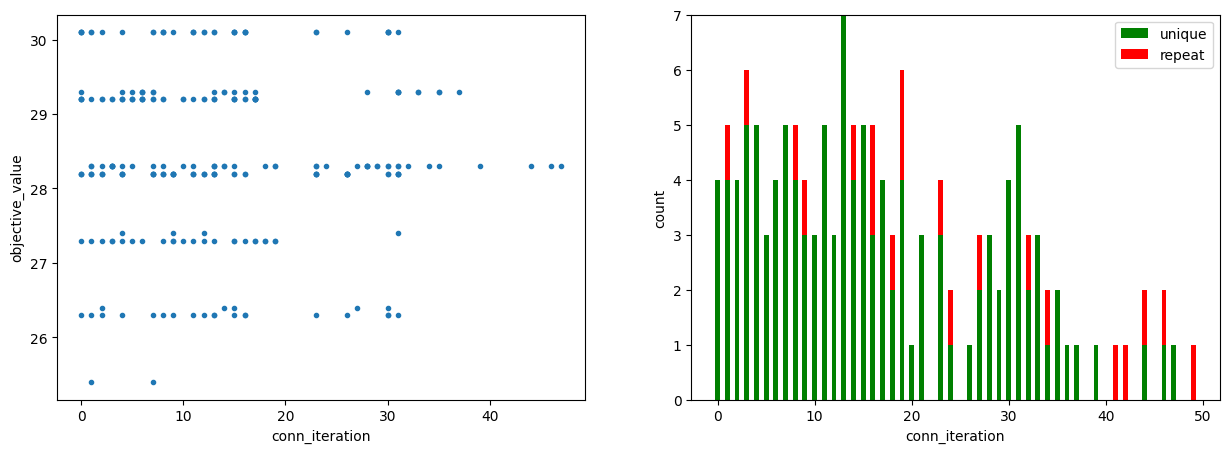

In [161]:
def connector_iterations_plot(df_results):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Show only the top 25% of ranks
    rank_limit = df_results["objective_value_rank"].max() // 4
    df = df_results[df_results["is_unique"] & (df_results["objective_value_rank"] <= rank_limit)]
    axes[0].scatter(df["conn_iteration"], df["objective_value"], marker=".")
    axes[0].set_xlabel("conn_iteration")
    axes[0].set_ylabel("objective_value")
    
    df_summ = (df_results[df_results["idx_in_bottom_location"] == 0]
               .groupby("conn_iteration")
          ["is_unique"]
          .apply(lambda s: pd.Series(index=pd.Index(name="tmp_is_unique", data=[True, False]),
                                     data=(np.sum(s == True), np.sum(s == False))))
          .reset_index()
          .rename(columns={"is_unique": "count", "tmp_is_unique": "is_unique"})
         )
    df = df_summ[df_summ["is_unique"] == True]
    axes[1].bar(df["conn_iteration"], df["count"], 0.5, label="unique", color="green")
    bottom = df["count"]
    df = df_summ[df_summ["is_unique"] == False]
    axes[1].bar(df["conn_iteration"], df["count"], 0.5, label="repeat", color="red", bottom=bottom)
    axes[1].legend()
    axes[1].set_xlabel("conn_iteration")
    axes[1].set_ylabel("count")
    plt.close()
    return fig
connector_iterations_plot(df_results)

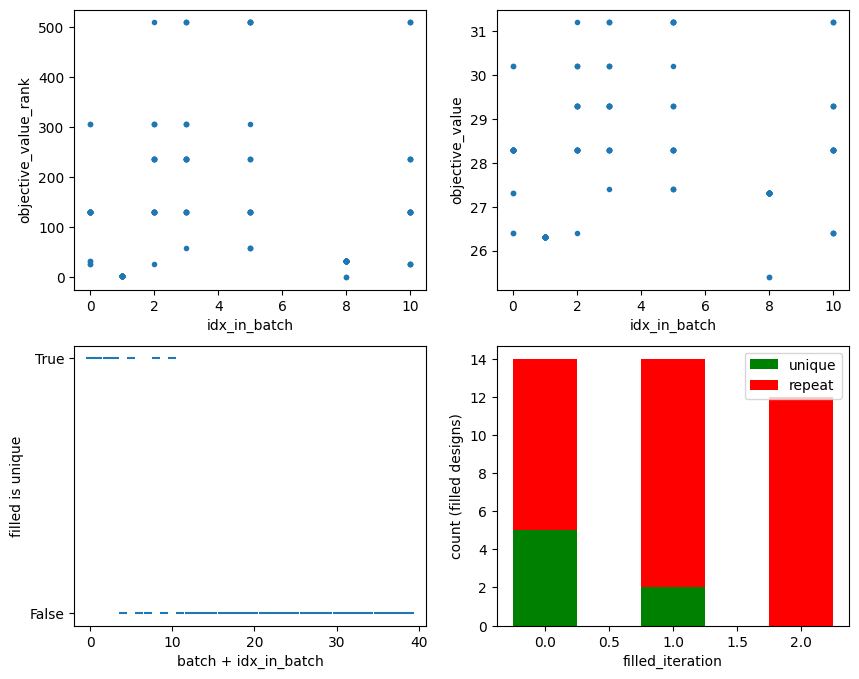

In [162]:
# To see how being good in a batch is related to being good at the end (may affect hwo deep to go in batches)
#scatter plot of the idx_in_batch and the final rank
#maybe restrict to idx_in_bottom_location == 0
#Number of filled_is_unique per batch (or maybe as a fraction?). Need to reduce to batch_idx, idx_in_batch
def batch_plot(df_filled_results, df_results):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    df = df_results[df_results["idx_in_bottom_location"] == 0]
    ax = axes[0, 0]
    ax.scatter(df["idx_in_batch"], df["objective_value_rank"], marker=".")
    ax.set_xlabel("idx_in_batch")
    ax.set_ylabel("objective_value_rank")

    ax = axes[0, 1]
    ax.scatter(df["idx_in_batch"], df["objective_value"], marker=".")
    ax.set_xlabel("idx_in_batch")
    ax.set_ylabel("objective_value")

    ax = axes[1, 0]
    batch_size = df_filled_results["idx_in_batch"].max() + 1
    df_filled_results["idx"] = df_filled_results["batch_idx"] * batch_size + df_filled_results["idx_in_batch"]

    ax.scatter(df_filled_results["idx"], df_filled_results["filled_is_unique"], marker="_")
    for batch in range(0, df["batch_idx"].max()):
        ax.axvline((batch + 1) * batch_size, color="gray", zorder=0)
    ax.set_xlabel("batch + idx_in_batch")
    ax.set_ylabel("filled is unique")
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["False", "True"])
    
    ax = axes[1, 1]
    df_summ = (df_filled_results
               .groupby("filled_iteration")
          ["filled_is_unique"]
          .apply(lambda s: pd.Series(index=pd.Index(name="tmp_filled_is_unique", data=[True, False]),
                                     data=(np.sum(s == True), np.sum(s == False))))
          .reset_index()
          .rename(columns={"filled_is_unique": "count", "tmp_filled_is_unique": "filled_is_unique"})
         )
    df = df_summ[df_summ["filled_is_unique"] == True]
    ax.bar(df["filled_iteration"], df["count"], 0.5, label="unique", color="green")
    bottom = df["count"]
    df = df_summ[df_summ["filled_is_unique"] == False]
    ax.bar(df["filled_iteration"], df["count"], 0.5, label="repeat", color="red", bottom=bottom)
    ax.legend()
    ax.set_xlabel("filled_iteration")
    ax.set_ylabel("count (filled designs)")

    plt.close()
    return fig
batch_plot(df_filled_results, df_results)

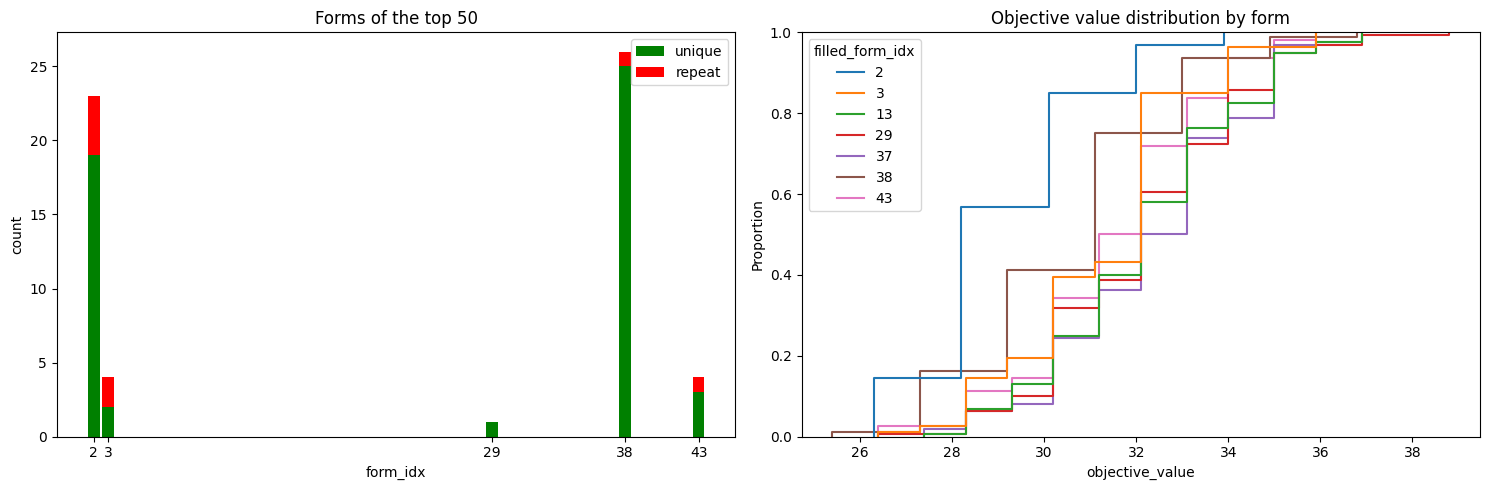

In [215]:
#To look at form indices
#Among best N, what is the distribution of filled_form_idx
#For each filled_form_idx, what's the distribution of scores
def forms_plot(df_results, top_n=50):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    ax = axes[0]
    df_best_forms = df_results[df_results["objective_value_rank"] < top_n]
    best_unique = df_best_forms.loc[df_best_forms["is_unique"], "filled_form_idx"].value_counts().rename("unique")
    best_repeat = df_best_forms.loc[~df_best_forms["is_unique"], "filled_form_idx"].value_counts().rename("repeat")
    df_merged = pd.DataFrame(best_unique).merge(pd.DataFrame(best_repeat), left_index=True, right_index=True, how="outer")
    
    ax.bar(df_merged.index, df_merged["unique"], color="green", label="unique")
    ax.bar(df_merged.index, df_merged["repeat"], bottom=df_merged["unique"], color="red", label="repeat")
    ax.set_xticks(df_merged.index)
    ax.set_xlabel("form_idx")
    ax.set_ylabel("count")
    ax.set_title(f"Forms of the top {top_n}")
    ax.legend()
    
    ax = axes[1]
    sns.ecdfplot(ax=ax, data=df_results, x="objective_value", hue="filled_form_idx", palette="tab10")
    ax.set_title("Objective value distribution by form")
    
    fig.tight_layout()
    plt.close()
    return fig

forms_plot(df_results)

In [37]:
# This was originally drafted by ChatGPT!
def rankdata(a):
    """Assigns rank to data, dealing with ties appropriately."""
    a = np.asarray(a)
    s = np.argsort(a)
    ranks = np.empty_like(s)
    ranks[s] = np.arange(len(a))
    ties = np.flatnonzero(np.diff(a[s]) == 0)
    print(ties)
    if len(ties) == 0:
        return ranks + 1
    else:
        ties += 1
        rt = np.empty_like(ties, dtype=np.float64)
        rt[0] = ranks[s][ties[0] - 1] + 1
        for i in range(1, len(ties)):
            prev_tie = ties[i - 1]
            this_tie = ties[i]
            rt[i] = ranks[s][this_tie - 1] + 1
            if this_tie - prev_tie == 2:
                rt[i - 1] = ranks[s][prev_tie] + 1
            elif this_tie - prev_tie > 2:
                rt[i - 1] = ranks[s][prev_tie] + 1
        rt[-1] = ranks[s][ties[-1]] + 1
        ranks[s[ties]] = rt
        return ranks
    
rankdata([10, 20, 20, 20, 30, 30, 40, 50])

[1 2 4]


array([0, 1, 2, 4, 4, 6, 6, 7])

In [42]:
# My version using some of those ideas
def rankdata2(a):
    """Assigns rank to data, dealing with ties appropriately."""
    a = np.asarray(a)
    s = np.argsort(a)
    ranks = np.empty_like(s)
    ranks[s] = np.arange(len(a))
    ties = np.flatnonzero(np.diff(a[s]) == 0)
    #print(ties)
    for tie_idx in ties:
        ranks[s[tie_idx + 1]] = ranks[s[tie_idx]]
    return ranks
    
display(rankdata2([10, 20, 20, 20, 30, 30, 40, 50]))
display(rankdata2(list(reversed([10, 20, 20, 20, 30, 30, 40, 50]))))

array([0, 1, 1, 1, 4, 4, 6, 7])

array([7, 6, 4, 4, 1, 1, 1, 0])